# Paths between BP solutions

Given a graph where some factors were removed to expose leaves:

- construct two basis $\mathcal{B^{(1)}}=\{v_1^{(1)},...,v_k^{(1)}\}$ and $\mathcal{B^{(2)}}=\{v_1^{(2)},...,v_k^{(2)}\}$ using leaf removal
- find 2 distinct solutions $x_1,x_2$ using BP + decimation on independent variables
- investigate a few possible paths connecting $x_1$ to $x_2$

<!-- - build $x=x_1\oplus x_2$
- find a path $P$ of "small" jumps from $0$ to $x$ by writing $x$ as a combination of basis vectors $x=\alpha^i v_i$
- obtain the corresponding path $P_1=P\oplus x_1$ going from $x_1$ to $x_2$
- plot the distortion of of the codeword along the path from $x_1$ to $x_2$ -->

In [658]:
include("../code/bp_full.jl")
include("../code/seaweed.jl")
using OffsetArrays

Build graph and remove some factors

In [659]:
m = factorial(5)*11*10
R = 0.8/3
f3 = 1 - 3R
n = round(Int, 3m/(2+f3))
@show n
Λ = [0,1-f3,f3]
K = [0,0,1]
nedges = 3m
# b is the number of factors to be removed
b = round(Int, 3*sqrt(n))

n = 18000


402

In [660]:
Ht = ldpc_matrix(n, m, nedges, Λ, K)
# remove b factors
Ht = Ht[:,1:end-b]
dropzeros!(Ht)
H = sparse(permutedims(copy(Ht)));

In [661]:
pleaves = proportionmap(vec(sum(H,dims=1)))[1]
println("Porportion of leaves: ", pleaves)

Porportion of leaves: 0.04922222222222222


### Build two basis using leaf removal

We build two different basis => two sets of independent variables => use them to find 2 different BP solutions

In [662]:
BB1, indep1 = findbasis(H)
@assert iszero(H*BB1.%2)
dim1 = length(indep1)

5202

In [663]:
BB2, indep2 = findbasis(H)
@assert iszero(H*BB2.%2)
dim2 = length(indep2)

5202

### Find 2 BP solutions

In [664]:
# external field strength
HH = 1.4
s = rand((-1,1), n)
efield = [(exp(ss*HH),exp(-ss*HH)) for ss in s]
bp = BPFull(H)
bp.efield .= efield;

In [665]:
bp1 = deepcopy(bp)
bp2 = deepcopy(bp);

In [666]:
nunsat1,_,dist1 = decimate!(bp1, efield, indep1, s;  tol=1e-4, fair_decimation=true, callback=cb_decimation)

Avg distortion after 1st BP round: 0.2275676214228486
 Step    0. Free = 5202. Maxfield = -Inf. ε = 8.19E-05. Unsat = 539. Ovl = 0.602. Iters 158
 Step    1. Free = 5201. Maxfield = 1.00E+00. ε = 9.29E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    2. Free = 5200. Maxfield = 1.00E+00. ε = 7.18E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    3. Free = 5199. Maxfield = 1.00E+00. ε = 5.23E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    4. Free = 5198. Maxfield = 1.00E+00. ε = 4.86E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    5. Free = 5197. Maxfield = 1.00E+00. ε = 7.97E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    6. Free = 5196. Maxfield = 1.00E+00. ε = 3.51E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    7. Free = 5195. Maxfield = 1.00E+00. ε = 2.40E-05. Unsat = 539. Ovl = 0.602. Iters 4
 Step    8. Free = 5194. Maxfield = 1.00E+00. ε = 1.91E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    9. Free = 5193. Maxfield = 1.00E+00. ε = 2.40E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step   

 Step  109. Free = 5093. Maxfield = 1.00E+00. ε = 8.01E-05. Unsat = 539. Ovl = 0.602. Iters 6
 Step  110. Free = 5092. Maxfield = 1.00E+00. ε = 9.91E-05. Unsat = 539. Ovl = 0.602. Iters 6
 Step  111. Free = 5091. Maxfield = 1.00E+00. ε = 5.19E-05. Unsat = 539. Ovl = 0.602. Iters 6
 Step  112. Free = 5090. Maxfield = 1.00E+00. ε = 4.70E-05. Unsat = 539. Ovl = 0.602. Iters 4
 Step  113. Free = 5089. Maxfield = 1.00E+00. ε = 7.42E-05. Unsat = 539. Ovl = 0.602. Iters 8
 Step  114. Free = 5088. Maxfield = 1.00E+00. ε = 7.71E-05. Unsat = 539. Ovl = 0.602. Iters 8
 Step  115. Free = 5087. Maxfield = 1.00E+00. ε = 9.19E-05. Unsat = 539. Ovl = 0.602. Iters 7
 Step  116. Free = 5086. Maxfield = 1.00E+00. ε = 7.44E-05. Unsat = 539. Ovl = 0.602. Iters 12
 Step  117. Free = 5085. Maxfield = 1.00E+00. ε = 6.36E-05. Unsat = 539. Ovl = 0.602. Iters 5
 Step  118. Free = 5084. Maxfield = 1.00E+00. ε = 3.24E-05. Unsat = 539. Ovl = 0.602. Iters 6
 Step  119. Free = 5083. Maxfield = 1.00E+00. ε = 5.88E-05.

 Step  217. Free = 4985. Maxfield = 1.00E+00. ε = 3.43E-05. Unsat = 539. Ovl = 0.602. Iters 11
 Step  218. Free = 4984. Maxfield = 1.00E+00. ε = 9.35E-05. Unsat = 539. Ovl = 0.602. Iters 8
 Step  219. Free = 4983. Maxfield = 1.00E+00. ε = 4.94E-05. Unsat = 539. Ovl = 0.602. Iters 4
 Step  220. Free = 4982. Maxfield = 1.00E+00. ε = 9.98E-05. Unsat = 539. Ovl = 0.602. Iters 13
 Step  221. Free = 4981. Maxfield = 1.00E+00. ε = 7.26E-05. Unsat = 539. Ovl = 0.602. Iters 11
 Step  222. Free = 4980. Maxfield = 1.00E+00. ε = 9.93E-05. Unsat = 539. Ovl = 0.602. Iters 11
 Step  223. Free = 4979. Maxfield = 1.00E+00. ε = 6.12E-05. Unsat = 539. Ovl = 0.602. Iters 10
 Step  224. Free = 4978. Maxfield = 1.00E+00. ε = 8.00E-05. Unsat = 539. Ovl = 0.602. Iters 8
 Step  225. Free = 4977. Maxfield = 1.00E+00. ε = 8.70E-05. Unsat = 539. Ovl = 0.602. Iters 11
 Step  226. Free = 4976. Maxfield = 1.00E+00. ε = 7.34E-05. Unsat = 539. Ovl = 0.602. Iters 9
 Step  227. Free = 4975. Maxfield = 1.00E+00. ε = 6.71

 Step  325. Free = 4877. Maxfield = 1.00E+00. ε = 5.92E-05. Unsat = 539. Ovl = 0.602. Iters 11
 Step  326. Free = 4876. Maxfield = 1.00E+00. ε = 7.75E-05. Unsat = 539. Ovl = 0.602. Iters 13
 Step  327. Free = 4875. Maxfield = 1.00E+00. ε = 8.76E-05. Unsat = 539. Ovl = 0.602. Iters 15
 Step  328. Free = 4874. Maxfield = 1.00E+00. ε = 3.12E-05. Unsat = 539. Ovl = 0.601. Iters 18
 Step  329. Free = 4873. Maxfield = 1.00E+00. ε = 4.00E-05. Unsat = 539. Ovl = 0.601. Iters 17
 Step  330. Free = 4872. Maxfield = 1.00E+00. ε = 8.67E-05. Unsat = 539. Ovl = 0.601. Iters 13
 Step  331. Free = 4871. Maxfield = 1.00E+00. ε = 5.50E-05. Unsat = 539. Ovl = 0.601. Iters 14
 Step  332. Free = 4870. Maxfield = 1.00E+00. ε = 4.32E-05. Unsat = 539. Ovl = 0.601. Iters 12
 Step  333. Free = 4869. Maxfield = 1.00E+00. ε = 7.70E-05. Unsat = 539. Ovl = 0.601. Iters 10
 Step  334. Free = 4868. Maxfield = 1.00E+00. ε = 6.99E-05. Unsat = 539. Ovl = 0.601. Iters 14
 Step  335. Free = 4867. Maxfield = 1.00E+00. ε = 

 Step  433. Free = 4769. Maxfield = 1.00E+00. ε = 7.67E-05. Unsat = 539. Ovl = 0.601. Iters 14
 Step  434. Free = 4768. Maxfield = 1.00E+00. ε = 4.77E-05. Unsat = 539. Ovl = 0.601. Iters 18
 Step  435. Free = 4767. Maxfield = 1.00E+00. ε = 9.27E-05. Unsat = 539. Ovl = 0.601. Iters 11
 Step  436. Free = 4766. Maxfield = 1.00E+00. ε = 7.03E-05. Unsat = 539. Ovl = 0.601. Iters 17
 Step  437. Free = 4765. Maxfield = 1.00E+00. ε = 6.84E-05. Unsat = 539. Ovl = 0.601. Iters 17
 Step  438. Free = 4764. Maxfield = 1.00E+00. ε = 6.54E-05. Unsat = 539. Ovl = 0.601. Iters 12
 Step  439. Free = 4763. Maxfield = 1.00E+00. ε = 9.54E-05. Unsat = 539. Ovl = 0.601. Iters 13
 Step  440. Free = 4762. Maxfield = 1.00E+00. ε = 9.14E-05. Unsat = 539. Ovl = 0.601. Iters 18
 Step  441. Free = 4761. Maxfield = 1.00E+00. ε = 9.07E-05. Unsat = 539. Ovl = 0.601. Iters 18
 Step  442. Free = 4760. Maxfield = 1.00E+00. ε = 7.65E-05. Unsat = 539. Ovl = 0.601. Iters 19
 Step  443. Free = 4759. Maxfield = 1.00E+00. ε = 

 Step  541. Free = 4661. Maxfield = 9.99E-01. ε = 8.94E-05. Unsat = 533. Ovl = 0.601. Iters 18
 Step  542. Free = 4660. Maxfield = 9.99E-01. ε = 8.58E-05. Unsat = 533. Ovl = 0.601. Iters 11
 Step  543. Free = 4659. Maxfield = 9.99E-01. ε = 5.43E-05. Unsat = 533. Ovl = 0.601. Iters 21
 Step  544. Free = 4658. Maxfield = 9.99E-01. ε = 5.97E-05. Unsat = 533. Ovl = 0.601. Iters 17
 Step  545. Free = 4657. Maxfield = 1.00E+00. ε = 9.68E-05. Unsat = 533. Ovl = 0.601. Iters 6
 Step  546. Free = 4656. Maxfield = 9.99E-01. ε = 8.88E-05. Unsat = 533. Ovl = 0.601. Iters 16
 Step  547. Free = 4655. Maxfield = 9.99E-01. ε = 8.30E-05. Unsat = 533. Ovl = 0.601. Iters 22
 Step  548. Free = 4654. Maxfield = 9.99E-01. ε = 8.79E-05. Unsat = 533. Ovl = 0.601. Iters 16
 Step  549. Free = 4653. Maxfield = 9.99E-01. ε = 9.07E-05. Unsat = 533. Ovl = 0.601. Iters 18
 Step  550. Free = 4652. Maxfield = 9.99E-01. ε = 7.94E-05. Unsat = 533. Ovl = 0.601. Iters 22
 Step  551. Free = 4651. Maxfield = 9.99E-01. ε = 9

 Step  649. Free = 4553. Maxfield = 9.99E-01. ε = 9.51E-05. Unsat = 535. Ovl = 0.601. Iters 22
 Step  650. Free = 4552. Maxfield = 9.99E-01. ε = 9.42E-05. Unsat = 535. Ovl = 0.601. Iters 24
 Step  651. Free = 4551. Maxfield = 9.99E-01. ε = 9.90E-05. Unsat = 535. Ovl = 0.601. Iters 15
 Step  652. Free = 4550. Maxfield = 9.99E-01. ε = 6.46E-05. Unsat = 535. Ovl = 0.601. Iters 27
 Step  653. Free = 4549. Maxfield = 1.00E+00. ε = 8.73E-05. Unsat = 535. Ovl = 0.601. Iters 20
 Step  654. Free = 4548. Maxfield = 9.99E-01. ε = 8.97E-05. Unsat = 535. Ovl = 0.601. Iters 16
 Step  655. Free = 4547. Maxfield = 9.99E-01. ε = 9.94E-05. Unsat = 535. Ovl = 0.601. Iters 24
 Step  656. Free = 4546. Maxfield = 9.99E-01. ε = 8.35E-05. Unsat = 535. Ovl = 0.601. Iters 19
 Step  657. Free = 4545. Maxfield = 9.99E-01. ε = 9.88E-05. Unsat = 535. Ovl = 0.601. Iters 20
 Step  658. Free = 4544. Maxfield = 9.99E-01. ε = 8.53E-05. Unsat = 535. Ovl = 0.601. Iters 14
 Step  659. Free = 4543. Maxfield = 9.99E-01. ε = 

 Step  757. Free = 4445. Maxfield = 9.99E-01. ε = 7.82E-05. Unsat = 531. Ovl = 0.601. Iters 23
 Step  758. Free = 4444. Maxfield = 9.99E-01. ε = 7.83E-05. Unsat = 531. Ovl = 0.601. Iters 27
 Step  759. Free = 4443. Maxfield = 9.99E-01. ε = 8.44E-05. Unsat = 531. Ovl = 0.601. Iters 20
 Step  760. Free = 4442. Maxfield = 9.99E-01. ε = 9.74E-05. Unsat = 531. Ovl = 0.601. Iters 21
 Step  761. Free = 4441. Maxfield = 9.99E-01. ε = 7.31E-05. Unsat = 531. Ovl = 0.601. Iters 22
 Step  762. Free = 4440. Maxfield = 9.99E-01. ε = 7.79E-05. Unsat = 531. Ovl = 0.601. Iters 19
 Step  763. Free = 4439. Maxfield = 9.99E-01. ε = 9.58E-05. Unsat = 531. Ovl = 0.601. Iters 22
 Step  764. Free = 4438. Maxfield = 9.99E-01. ε = 7.91E-05. Unsat = 531. Ovl = 0.601. Iters 23
 Step  765. Free = 4437. Maxfield = 9.99E-01. ε = 8.07E-05. Unsat = 531. Ovl = 0.601. Iters 16
 Step  766. Free = 4436. Maxfield = 9.99E-01. ε = 8.84E-05. Unsat = 531. Ovl = 0.601. Iters 27
 Step  767. Free = 4435. Maxfield = 1.00E+00. ε = 

 Step  865. Free = 4337. Maxfield = 1.00E+00. ε = 6.88E-05. Unsat = 533. Ovl = 0.601. Iters 22
 Step  866. Free = 4336. Maxfield = 9.98E-01. ε = 9.88E-05. Unsat = 531. Ovl = 0.601. Iters 20
 Step  867. Free = 4335. Maxfield = 9.98E-01. ε = 8.34E-05. Unsat = 531. Ovl = 0.601. Iters 20
 Step  868. Free = 4334. Maxfield = 9.98E-01. ε = 7.49E-05. Unsat = 531. Ovl = 0.601. Iters 28
 Step  869. Free = 4333. Maxfield = 9.98E-01. ε = 5.72E-05. Unsat = 531. Ovl = 0.601. Iters 27
 Step  870. Free = 4332. Maxfield = 9.98E-01. ε = 9.42E-05. Unsat = 531. Ovl = 0.601. Iters 21
 Step  871. Free = 4331. Maxfield = 9.98E-01. ε = 8.85E-05. Unsat = 531. Ovl = 0.601. Iters 24
 Step  872. Free = 4330. Maxfield = 9.98E-01. ε = 9.35E-05. Unsat = 531. Ovl = 0.601. Iters 22
 Step  873. Free = 4329. Maxfield = 9.98E-01. ε = 5.59E-05. Unsat = 531. Ovl = 0.601. Iters 30
 Step  874. Free = 4328. Maxfield = 9.98E-01. ε = 6.65E-05. Unsat = 531. Ovl = 0.601. Iters 30
 Step  875. Free = 4327. Maxfield = 9.98E-01. ε = 

 Step  973. Free = 4229. Maxfield = 1.00E+00. ε = 6.64E-05. Unsat = 530. Ovl = 0.601. Iters 20
 Step  974. Free = 4228. Maxfield = 9.98E-01. ε = 9.54E-05. Unsat = 530. Ovl = 0.601. Iters 24
 Step  975. Free = 4227. Maxfield = 9.98E-01. ε = 6.63E-05. Unsat = 530. Ovl = 0.601. Iters 29
 Step  976. Free = 4226. Maxfield = 1.00E+00. ε = 7.56E-05. Unsat = 530. Ovl = 0.601. Iters 7
 Step  977. Free = 4225. Maxfield = 9.99E-01. ε = 9.01E-05. Unsat = 530. Ovl = 0.601. Iters 19
 Step  978. Free = 4224. Maxfield = 9.98E-01. ε = 8.92E-05. Unsat = 530. Ovl = 0.601. Iters 25
 Step  979. Free = 4223. Maxfield = 9.99E-01. ε = 8.74E-05. Unsat = 530. Ovl = 0.601. Iters 17
 Step  980. Free = 4222. Maxfield = 9.98E-01. ε = 7.75E-05. Unsat = 530. Ovl = 0.601. Iters 27
 Step  981. Free = 4221. Maxfield = 1.00E+00. ε = 8.67E-05. Unsat = 530. Ovl = 0.601. Iters 13
 Step  982. Free = 4220. Maxfield = 9.98E-01. ε = 9.46E-05. Unsat = 529. Ovl = 0.600. Iters 38
 Step  983. Free = 4219. Maxfield = 9.98E-01. ε = 5

 Step  1079. Free = 4123. Maxfield = 9.97E-01. ε = 9.92E-05. Unsat = 526. Ovl = 0.600. Iters 27
 Step  1080. Free = 4122. Maxfield = 9.97E-01. ε = 7.19E-05. Unsat = 526. Ovl = 0.600. Iters 36
 Step  1081. Free = 4121. Maxfield = 9.98E-01. ε = 6.17E-05. Unsat = 526. Ovl = 0.600. Iters 34
 Step  1082. Free = 4120. Maxfield = 9.97E-01. ε = 9.28E-05. Unsat = 526. Ovl = 0.600. Iters 25
 Step  1083. Free = 4119. Maxfield = 1.00E+00. ε = 9.30E-05. Unsat = 526. Ovl = 0.600. Iters 13
 Step  1084. Free = 4118. Maxfield = 9.99E-01. ε = 9.56E-05. Unsat = 526. Ovl = 0.600. Iters 18
 Step  1085. Free = 4117. Maxfield = 9.97E-01. ε = 9.08E-05. Unsat = 526. Ovl = 0.600. Iters 22
 Step  1086. Free = 4116. Maxfield = 9.97E-01. ε = 8.30E-05. Unsat = 526. Ovl = 0.600. Iters 32
 Step  1087. Free = 4115. Maxfield = 9.99E-01. ε = 8.52E-05. Unsat = 526. Ovl = 0.600. Iters 25
 Step  1088. Free = 4114. Maxfield = 9.97E-01. ε = 9.59E-05. Unsat = 526. Ovl = 0.600. Iters 34
 Step  1089. Free = 4113. Maxfield = 9.9

 Step  1185. Free = 4017. Maxfield = 9.97E-01. ε = 9.24E-05. Unsat = 524. Ovl = 0.600. Iters 25
 Step  1186. Free = 4016. Maxfield = 9.97E-01. ε = 7.67E-05. Unsat = 524. Ovl = 0.600. Iters 31
 Step  1187. Free = 4015. Maxfield = 9.97E-01. ε = 8.94E-05. Unsat = 524. Ovl = 0.600. Iters 24
 Step  1188. Free = 4014. Maxfield = 1.00E+00. ε = 4.74E-05. Unsat = 524. Ovl = 0.600. Iters 7
 Step  1189. Free = 4013. Maxfield = 9.97E-01. ε = 9.02E-05. Unsat = 524. Ovl = 0.600. Iters 30
 Step  1190. Free = 4012. Maxfield = 9.97E-01. ε = 9.96E-05. Unsat = 525. Ovl = 0.600. Iters 37
 Step  1191. Free = 4011. Maxfield = 9.97E-01. ε = 8.23E-05. Unsat = 525. Ovl = 0.600. Iters 38
 Step  1192. Free = 4010. Maxfield = 9.96E-01. ε = 9.86E-05. Unsat = 525. Ovl = 0.600. Iters 38
 Step  1193. Free = 4009. Maxfield = 9.96E-01. ε = 7.56E-05. Unsat = 525. Ovl = 0.600. Iters 25
 Step  1194. Free = 4008. Maxfield = 9.96E-01. ε = 9.52E-05. Unsat = 525. Ovl = 0.600. Iters 28
 Step  1195. Free = 4007. Maxfield = 9.96

 Step  1291. Free = 3911. Maxfield = 9.96E-01. ε = 9.86E-05. Unsat = 510. Ovl = 0.598. Iters 33
 Step  1292. Free = 3910. Maxfield = 9.96E-01. ε = 9.12E-05. Unsat = 510. Ovl = 0.598. Iters 32
 Step  1293. Free = 3909. Maxfield = 9.99E-01. ε = 9.51E-05. Unsat = 510. Ovl = 0.598. Iters 20
 Step  1294. Free = 3908. Maxfield = 9.96E-01. ε = 9.44E-05. Unsat = 510. Ovl = 0.598. Iters 34
 Step  1295. Free = 3907. Maxfield = 9.96E-01. ε = 9.52E-05. Unsat = 510. Ovl = 0.598. Iters 32
 Step  1296. Free = 3906. Maxfield = 1.00E+00. ε = 7.67E-05. Unsat = 510. Ovl = 0.598. Iters 4
 Step  1297. Free = 3905. Maxfield = 9.96E-01. ε = 9.62E-05. Unsat = 510. Ovl = 0.598. Iters 28
 Step  1298. Free = 3904. Maxfield = 9.96E-01. ε = 9.18E-05. Unsat = 510. Ovl = 0.598. Iters 26
 Step  1299. Free = 3903. Maxfield = 9.96E-01. ε = 9.07E-05. Unsat = 510. Ovl = 0.598. Iters 26
 Step  1300. Free = 3902. Maxfield = 9.96E-01. ε = 9.81E-05. Unsat = 510. Ovl = 0.598. Iters 38
 Step  1301. Free = 3901. Maxfield = 9.96

 Step  1397. Free = 3805. Maxfield = 9.95E-01. ε = 8.98E-05. Unsat = 499. Ovl = 0.598. Iters 35
 Step  1398. Free = 3804. Maxfield = 9.95E-01. ε = 9.64E-05. Unsat = 499. Ovl = 0.598. Iters 32
 Step  1399. Free = 3803. Maxfield = 9.95E-01. ε = 8.80E-05. Unsat = 499. Ovl = 0.598. Iters 41
 Step  1400. Free = 3802. Maxfield = 9.95E-01. ε = 8.63E-05. Unsat = 501. Ovl = 0.598. Iters 34
 Step  1401. Free = 3801. Maxfield = 1.00E+00. ε = 6.81E-05. Unsat = 501. Ovl = 0.598. Iters 4
 Step  1402. Free = 3800. Maxfield = 9.95E-01. ε = 9.66E-05. Unsat = 501. Ovl = 0.598. Iters 31
 Step  1403. Free = 3799. Maxfield = 9.95E-01. ε = 7.80E-05. Unsat = 501. Ovl = 0.598. Iters 31
 Step  1404. Free = 3798. Maxfield = 9.95E-01. ε = 9.99E-05. Unsat = 501. Ovl = 0.598. Iters 36
 Step  1405. Free = 3797. Maxfield = 9.95E-01. ε = 8.88E-05. Unsat = 501. Ovl = 0.598. Iters 32
 Step  1406. Free = 3796. Maxfield = 9.95E-01. ε = 7.29E-05. Unsat = 501. Ovl = 0.598. Iters 40
 Step  1407. Free = 3795. Maxfield = 9.95

 Step  1503. Free = 3699. Maxfield = 9.94E-01. ε = 9.04E-05. Unsat = 492. Ovl = 0.597. Iters 34
 Step  1504. Free = 3698. Maxfield = 9.94E-01. ε = 7.18E-05. Unsat = 494. Ovl = 0.597. Iters 35
 Step  1505. Free = 3697. Maxfield = 9.94E-01. ε = 8.46E-05. Unsat = 491. Ovl = 0.597. Iters 34
 Step  1506. Free = 3696. Maxfield = 1.00E+00. ε = 8.19E-05. Unsat = 493. Ovl = 0.597. Iters 4
 Step  1507. Free = 3695. Maxfield = 9.94E-01. ε = 8.71E-05. Unsat = 488. Ovl = 0.596. Iters 109
 Step  1508. Free = 3694. Maxfield = 9.99E-01. ε = 8.91E-05. Unsat = 488. Ovl = 0.596. Iters 17
 Step  1509. Free = 3693. Maxfield = 9.99E-01. ε = 8.97E-05. Unsat = 488. Ovl = 0.596. Iters 22
 Step  1510. Free = 3692. Maxfield = 9.97E-01. ε = 5.87E-05. Unsat = 488. Ovl = 0.596. Iters 24
 Step  1511. Free = 3691. Maxfield = 9.96E-01. ε = 9.48E-05. Unsat = 488. Ovl = 0.596. Iters 35
 Step  1512. Free = 3690. Maxfield = 9.96E-01. ε = 9.16E-05. Unsat = 490. Ovl = 0.596. Iters 31
 Step  1513. Free = 3689. Maxfield = 9.9

 Step  1609. Free = 3593. Maxfield = 9.93E-01. ε = 8.98E-05. Unsat = 514. Ovl = 0.598. Iters 31
 Step  1610. Free = 3592. Maxfield = 9.93E-01. ε = 9.75E-05. Unsat = 519. Ovl = 0.599. Iters 42
 Step  1611. Free = 3591. Maxfield = 9.93E-01. ε = 9.17E-05. Unsat = 517. Ovl = 0.598. Iters 47
 Step  1612. Free = 3590. Maxfield = 1.00E+00. ε = 9.40E-05. Unsat = 517. Ovl = 0.598. Iters 9
 Step  1613. Free = 3589. Maxfield = 9.93E-01. ε = 9.50E-05. Unsat = 517. Ovl = 0.598. Iters 29
 Step  1614. Free = 3588. Maxfield = 9.93E-01. ε = 9.38E-05. Unsat = 517. Ovl = 0.599. Iters 43
 Step  1615. Free = 3587. Maxfield = 9.93E-01. ε = 9.77E-05. Unsat = 517. Ovl = 0.599. Iters 39
 Step  1616. Free = 3586. Maxfield = 9.93E-01. ε = 8.39E-05. Unsat = 517. Ovl = 0.599. Iters 30
 Step  1617. Free = 3585. Maxfield = 9.93E-01. ε = 8.74E-05. Unsat = 517. Ovl = 0.599. Iters 33
 Step  1618. Free = 3584. Maxfield = 9.93E-01. ε = 9.97E-05. Unsat = 519. Ovl = 0.599. Iters 30
 Step  1619. Free = 3583. Maxfield = 9.98

 Step  1715. Free = 3487. Maxfield = 9.96E-01. ε = 8.35E-05. Unsat = 581. Ovl = 0.604. Iters 35
 Step  1716. Free = 3486. Maxfield = 9.93E-01. ε = 8.98E-05. Unsat = 581. Ovl = 0.604. Iters 39
 Step  1717. Free = 3485. Maxfield = 9.94E-01. ε = 7.96E-05. Unsat = 581. Ovl = 0.604. Iters 37
 Step  1718. Free = 3484. Maxfield = 9.93E-01. ε = 9.77E-05. Unsat = 581. Ovl = 0.604. Iters 37
 Step  1719. Free = 3483. Maxfield = 1.00E+00. ε = 9.52E-05. Unsat = 581. Ovl = 0.604. Iters 7
 Step  1720. Free = 3482. Maxfield = 9.93E-01. ε = 9.42E-05. Unsat = 582. Ovl = 0.604. Iters 47
 Step  1721. Free = 3481. Maxfield = 1.00E+00. ε = 7.97E-05. Unsat = 582. Ovl = 0.604. Iters 13
 Step  1722. Free = 3480. Maxfield = 9.94E-01. ε = 9.74E-05. Unsat = 581. Ovl = 0.604. Iters 51
 Step  1723. Free = 3479. Maxfield = 9.98E-01. ε = 8.93E-05. Unsat = 581. Ovl = 0.604. Iters 34
 Step  1724. Free = 3478. Maxfield = 9.93E-01. ε = 8.17E-05. Unsat = 581. Ovl = 0.604. Iters 43
 Step  1725. Free = 3477. Maxfield = 9.93

 Step  1821. Free = 3381. Maxfield = 9.91E-01. ε = 8.70E-05. Unsat = 563. Ovl = 0.602. Iters 43
 Step  1822. Free = 3380. Maxfield = 9.91E-01. ε = 8.63E-05. Unsat = 563. Ovl = 0.602. Iters 40
 Step  1823. Free = 3379. Maxfield = 9.91E-01. ε = 9.64E-05. Unsat = 558. Ovl = 0.602. Iters 40
 Step  1824. Free = 3378. Maxfield = 9.99E-01. ε = 7.78E-05. Unsat = 558. Ovl = 0.602. Iters 26
 Step  1825. Free = 3377. Maxfield = 9.91E-01. ε = 7.72E-05. Unsat = 558. Ovl = 0.602. Iters 41
 Step  1826. Free = 3376. Maxfield = 9.96E-01. ε = 9.46E-05. Unsat = 558. Ovl = 0.602. Iters 39
 Step  1827. Free = 3375. Maxfield = 9.91E-01. ε = 5.56E-05. Unsat = 558. Ovl = 0.602. Iters 57
 Step  1828. Free = 3374. Maxfield = 9.97E-01. ε = 9.91E-05. Unsat = 556. Ovl = 0.602. Iters 37
 Step  1829. Free = 3373. Maxfield = 9.91E-01. ε = 9.05E-05. Unsat = 558. Ovl = 0.602. Iters 36
 Step  1830. Free = 3372. Maxfield = 9.92E-01. ε = 9.50E-05. Unsat = 559. Ovl = 0.602. Iters 39
 Step  1831. Free = 3371. Maxfield = 9.9

 Step  1927. Free = 3275. Maxfield = 9.90E-01. ε = 5.68E-05. Unsat = 546. Ovl = 0.600. Iters 37
 Step  1928. Free = 3274. Maxfield = 9.90E-01. ε = 8.34E-05. Unsat = 546. Ovl = 0.600. Iters 47
 Step  1929. Free = 3273. Maxfield = 9.90E-01. ε = 9.28E-05. Unsat = 546. Ovl = 0.600. Iters 41
 Step  1930. Free = 3272. Maxfield = 9.90E-01. ε = 8.57E-05. Unsat = 543. Ovl = 0.600. Iters 46
 Step  1931. Free = 3271. Maxfield = 9.93E-01. ε = 9.60E-05. Unsat = 545. Ovl = 0.600. Iters 42
 Step  1932. Free = 3270. Maxfield = 9.91E-01. ε = 8.00E-05. Unsat = 545. Ovl = 0.600. Iters 43
 Step  1933. Free = 3269. Maxfield = 9.98E-01. ε = 9.87E-05. Unsat = 545. Ovl = 0.600. Iters 25
 Step  1934. Free = 3268. Maxfield = 9.90E-01. ε = 9.60E-05. Unsat = 545. Ovl = 0.600. Iters 42
 Step  1935. Free = 3267. Maxfield = 9.96E-01. ε = 8.60E-05. Unsat = 547. Ovl = 0.600. Iters 35
 Step  1936. Free = 3266. Maxfield = 9.90E-01. ε = 8.64E-05. Unsat = 545. Ovl = 0.600. Iters 39
 Step  1937. Free = 3265. Maxfield = 9.9

 Step  2033. Free = 3169. Maxfield = 9.88E-01. ε = 9.58E-05. Unsat = 536. Ovl = 0.599. Iters 40
 Step  2034. Free = 3168. Maxfield = 9.88E-01. ε = 9.28E-05. Unsat = 536. Ovl = 0.599. Iters 51
 Step  2035. Free = 3167. Maxfield = 9.88E-01. ε = 8.93E-05. Unsat = 536. Ovl = 0.599. Iters 50
 Step  2036. Free = 3166. Maxfield = 9.88E-01. ε = 9.89E-05. Unsat = 536. Ovl = 0.599. Iters 55
 Step  2037. Free = 3165. Maxfield = 9.88E-01. ε = 9.26E-05. Unsat = 536. Ovl = 0.599. Iters 47
 Step  2038. Free = 3164. Maxfield = 9.88E-01. ε = 9.57E-05. Unsat = 536. Ovl = 0.599. Iters 58
 Step  2039. Free = 3163. Maxfield = 1.00E+00. ε = 7.87E-05. Unsat = 536. Ovl = 0.599. Iters 3
 Step  2040. Free = 3162. Maxfield = 9.89E-01. ε = 9.39E-05. Unsat = 534. Ovl = 0.599. Iters 51
 Step  2041. Free = 3161. Maxfield = 9.88E-01. ε = 7.61E-05. Unsat = 535. Ovl = 0.599. Iters 58
 Step  2042. Free = 3160. Maxfield = 1.00E+00. ε = 8.41E-05. Unsat = 533. Ovl = 0.599. Iters 19
 Step  2043. Free = 3159. Maxfield = 1.00

 Step  2139. Free = 3063. Maxfield = 9.92E-01. ε = 8.19E-05. Unsat = 512. Ovl = 0.596. Iters 26
 Step  2140. Free = 3062. Maxfield = 9.89E-01. ε = 9.77E-05. Unsat = 512. Ovl = 0.596. Iters 56
 Step  2141. Free = 3061. Maxfield = 9.89E-01. ε = 9.51E-05. Unsat = 512. Ovl = 0.596. Iters 51
 Step  2142. Free = 3060. Maxfield = 1.00E+00. ε = 7.40E-05. Unsat = 512. Ovl = 0.596. Iters 9
 Step  2143. Free = 3059. Maxfield = 9.89E-01. ε = 9.73E-05. Unsat = 513. Ovl = 0.596. Iters 47
 Step  2144. Free = 3058. Maxfield = 9.89E-01. ε = 8.61E-05. Unsat = 515. Ovl = 0.596. Iters 40
 Step  2145. Free = 3057. Maxfield = 9.92E-01. ε = 9.99E-05. Unsat = 515. Ovl = 0.596. Iters 46
 Step  2146. Free = 3056. Maxfield = 9.89E-01. ε = 9.95E-05. Unsat = 515. Ovl = 0.596. Iters 59
 Step  2147. Free = 3055. Maxfield = 9.91E-01. ε = 8.53E-05. Unsat = 514. Ovl = 0.596. Iters 63
 Step  2148. Free = 3054. Maxfield = 9.99E-01. ε = 9.84E-05. Unsat = 515. Ovl = 0.596. Iters 32
 Step  2149. Free = 3053. Maxfield = 1.00

 Step  2245. Free = 2957. Maxfield = 9.99E-01. ε = 9.90E-05. Unsat = 516. Ovl = 0.595. Iters 24
 Step  2246. Free = 2956. Maxfield = 9.99E-01. ε = 7.25E-05. Unsat = 516. Ovl = 0.595. Iters 29
 Step  2247. Free = 2955. Maxfield = 9.99E-01. ε = 7.03E-05. Unsat = 516. Ovl = 0.595. Iters 37
 Step  2248. Free = 2954. Maxfield = 9.98E-01. ε = 8.60E-05. Unsat = 516. Ovl = 0.595. Iters 33
 Step  2249. Free = 2953. Maxfield = 9.97E-01. ε = 7.90E-05. Unsat = 516. Ovl = 0.595. Iters 46
 Step  2250. Free = 2952. Maxfield = 1.00E+00. ε = 9.12E-05. Unsat = 516. Ovl = 0.595. Iters 9
 Step  2251. Free = 2951. Maxfield = 9.96E-01. ε = 9.33E-05. Unsat = 516. Ovl = 0.595. Iters 49
 Step  2252. Free = 2950. Maxfield = 9.99E-01. ε = 9.04E-05. Unsat = 516. Ovl = 0.595. Iters 27
 Step  2253. Free = 2949. Maxfield = 9.94E-01. ε = 9.81E-05. Unsat = 516. Ovl = 0.595. Iters 33
 Step  2254. Free = 2948. Maxfield = 9.93E-01. ε = 9.73E-05. Unsat = 515. Ovl = 0.595. Iters 52
 Step  2255. Free = 2947. Maxfield = 1.00

 Step  2351. Free = 2851. Maxfield = 9.90E-01. ε = 9.36E-05. Unsat = 491. Ovl = 0.592. Iters 61
 Step  2352. Free = 2850. Maxfield = 9.91E-01. ε = 9.11E-05. Unsat = 491. Ovl = 0.592. Iters 61
 Step  2353. Free = 2849. Maxfield = 9.90E-01. ε = 9.03E-05. Unsat = 492. Ovl = 0.593. Iters 57
 Step  2354. Free = 2848. Maxfield = 1.00E+00. ε = 9.64E-05. Unsat = 492. Ovl = 0.593. Iters 17
 Step  2355. Free = 2847. Maxfield = 1.00E+00. ε = 6.67E-05. Unsat = 492. Ovl = 0.593. Iters 9
 Step  2356. Free = 2846. Maxfield = 9.98E-01. ε = 9.96E-05. Unsat = 492. Ovl = 0.593. Iters 32
 Step  2357. Free = 2845. Maxfield = 1.00E+00. ε = 4.87E-05. Unsat = 492. Ovl = 0.593. Iters 10
 Step  2358. Free = 2844. Maxfield = 9.90E-01. ε = 9.51E-05. Unsat = 491. Ovl = 0.593. Iters 75
 Step  2359. Free = 2843. Maxfield = 9.89E-01. ε = 8.66E-05. Unsat = 492. Ovl = 0.593. Iters 72
 Step  2360. Free = 2842. Maxfield = 9.91E-01. ε = 8.08E-05. Unsat = 492. Ovl = 0.593. Iters 43
 Step  2361. Free = 2841. Maxfield = 9.93

 Step  2457. Free = 2745. Maxfield = 9.84E-01. ε = 9.13E-05. Unsat = 453. Ovl = 0.589. Iters 64
 Step  2458. Free = 2744. Maxfield = 9.87E-01. ε = 8.97E-05. Unsat = 457. Ovl = 0.589. Iters 58
 Step  2459. Free = 2743. Maxfield = 9.96E-01. ε = 9.93E-05. Unsat = 455. Ovl = 0.589. Iters 33
 Step  2460. Free = 2742. Maxfield = 9.84E-01. ε = 8.38E-05. Unsat = 455. Ovl = 0.589. Iters 60
 Step  2461. Free = 2741. Maxfield = 9.84E-01. ε = 9.39E-05. Unsat = 454. Ovl = 0.589. Iters 69
 Step  2462. Free = 2740. Maxfield = 9.86E-01. ε = 8.95E-05. Unsat = 454. Ovl = 0.589. Iters 53
 Step  2463. Free = 2739. Maxfield = 9.84E-01. ε = 8.25E-05. Unsat = 454. Ovl = 0.589. Iters 62
 Step  2464. Free = 2738. Maxfield = 1.00E+00. ε = 9.19E-05. Unsat = 454. Ovl = 0.589. Iters 3
 Step  2465. Free = 2737. Maxfield = 9.94E-01. ε = 9.59E-05. Unsat = 454. Ovl = 0.589. Iters 39
 Step  2466. Free = 2736. Maxfield = 9.84E-01. ε = 9.98E-05. Unsat = 454. Ovl = 0.589. Iters 50
 Step  2467. Free = 2735. Maxfield = 1.00

 Step  2563. Free = 2639. Maxfield = 9.86E-01. ε = 9.66E-05. Unsat = 446. Ovl = 0.588. Iters 60
 Step  2564. Free = 2638. Maxfield = 9.86E-01. ε = 8.22E-05. Unsat = 446. Ovl = 0.588. Iters 58
 Step  2565. Free = 2637. Maxfield = 1.00E+00. ε = 6.89E-05. Unsat = 444. Ovl = 0.588. Iters 22
 Step  2566. Free = 2636. Maxfield = 1.00E+00. ε = 7.06E-05. Unsat = 444. Ovl = 0.588. Iters 7
 Step  2567. Free = 2635. Maxfield = 9.86E-01. ε = 9.43E-05. Unsat = 444. Ovl = 0.588. Iters 75
 Step  2568. Free = 2634. Maxfield = 1.00E+00. ε = 5.73E-05. Unsat = 444. Ovl = 0.588. Iters 10
 Step  2569. Free = 2633. Maxfield = 9.86E-01. ε = 9.84E-05. Unsat = 444. Ovl = 0.588. Iters 59
 Step  2570. Free = 2632. Maxfield = 9.87E-01. ε = 8.46E-05. Unsat = 446. Ovl = 0.588. Iters 66
 Step  2571. Free = 2631. Maxfield = 9.86E-01. ε = 9.94E-05. Unsat = 446. Ovl = 0.588. Iters 50
 Step  2572. Free = 2630. Maxfield = 9.86E-01. ε = 7.60E-05. Unsat = 446. Ovl = 0.588. Iters 57
 Step  2573. Free = 2629. Maxfield = 9.86

 Step  2669. Free = 2533. Maxfield = 9.96E-01. ε = 9.59E-05. Unsat = 425. Ovl = 0.587. Iters 55
 Step  2670. Free = 2532. Maxfield = 9.84E-01. ε = 9.62E-05. Unsat = 427. Ovl = 0.587. Iters 79
 Step  2671. Free = 2531. Maxfield = 9.83E-01. ε = 9.13E-05. Unsat = 427. Ovl = 0.587. Iters 76
 Step  2672. Free = 2530. Maxfield = 9.99E-01. ε = 6.72E-05. Unsat = 427. Ovl = 0.587. Iters 30
 Step  2673. Free = 2529. Maxfield = 9.93E-01. ε = 9.65E-05. Unsat = 429. Ovl = 0.587. Iters 58
 Step  2674. Free = 2528. Maxfield = 9.85E-01. ε = 9.99E-05. Unsat = 425. Ovl = 0.587. Iters 85
 Step  2675. Free = 2527. Maxfield = 9.96E-01. ε = 8.01E-05. Unsat = 425. Ovl = 0.587. Iters 51
 Step  2676. Free = 2526. Maxfield = 9.89E-01. ε = 9.09E-05. Unsat = 425. Ovl = 0.587. Iters 48
 Step  2677. Free = 2525. Maxfield = 9.89E-01. ε = 9.47E-05. Unsat = 423. Ovl = 0.587. Iters 67
 Step  2678. Free = 2524. Maxfield = 9.85E-01. ε = 8.83E-05. Unsat = 423. Ovl = 0.587. Iters 64
 Step  2679. Free = 2523. Maxfield = 9.8

 Step  2775. Free = 2427. Maxfield = 1.00E+00. ε = 8.33E-05. Unsat = 416. Ovl = 0.586. Iters 13
 Step  2776. Free = 2426. Maxfield = 9.83E-01. ε = 9.18E-05. Unsat = 414. Ovl = 0.586. Iters 57
 Step  2777. Free = 2425. Maxfield = 9.90E-01. ε = 9.03E-05. Unsat = 416. Ovl = 0.586. Iters 67
 Step  2778. Free = 2424. Maxfield = 9.80E-01. ε = 9.52E-05. Unsat = 414. Ovl = 0.586. Iters 85
 Step  2779. Free = 2423. Maxfield = 9.80E-01. ε = 9.95E-05. Unsat = 415. Ovl = 0.586. Iters 84
 Step  2780. Free = 2422. Maxfield = 9.80E-01. ε = 8.96E-05. Unsat = 413. Ovl = 0.586. Iters 61
 Step  2781. Free = 2421. Maxfield = 9.80E-01. ε = 8.70E-05. Unsat = 414. Ovl = 0.586. Iters 91
 Step  2782. Free = 2420. Maxfield = 9.82E-01. ε = 9.70E-05. Unsat = 412. Ovl = 0.586. Iters 98
 Step  2783. Free = 2419. Maxfield = 1.00E+00. ε = 7.27E-05. Unsat = 412. Ovl = 0.586. Iters 9
 Step  2784. Free = 2418. Maxfield = 1.00E+00. ε = 7.52E-05. Unsat = 412. Ovl = 0.586. Iters 8
 Step  2785. Free = 2417. Maxfield = 1.00E

 Step  2881. Free = 2321. Maxfield = 9.82E-01. ε = 9.51E-05. Unsat = 396. Ovl = 0.584. Iters 91
 Step  2882. Free = 2320. Maxfield = 9.89E-01. ε = 9.94E-05. Unsat = 397. Ovl = 0.585. Iters 80
 Step  2883. Free = 2319. Maxfield = 1.00E+00. ε = 7.64E-05. Unsat = 397. Ovl = 0.585. Iters 12
 Step  2884. Free = 2318. Maxfield = 9.97E-01. ε = 8.28E-05. Unsat = 397. Ovl = 0.585. Iters 51
 Step  2885. Free = 2317. Maxfield = 1.00E+00. ε = 9.68E-05. Unsat = 397. Ovl = 0.585. Iters 25
 Step  2886. Free = 2316. Maxfield = 9.82E-01. ε = 9.43E-05. Unsat = 397. Ovl = 0.584. Iters 68
 Step  2887. Free = 2315. Maxfield = 9.81E-01. ε = 9.79E-05. Unsat = 399. Ovl = 0.585. Iters 97
 Step  2888. Free = 2314. Maxfield = 9.80E-01. ε = 9.57E-05. Unsat = 398. Ovl = 0.584. Iters 72
 Step  2889. Free = 2313. Maxfield = 9.81E-01. ε = 8.49E-05. Unsat = 398. Ovl = 0.585. Iters 78
 Step  2890. Free = 2312. Maxfield = 1.00E+00. ε = 7.71E-05. Unsat = 398. Ovl = 0.585. Iters 11
 Step  2891. Free = 2311. Maxfield = 1.0

 Step  2987. Free = 2215. Maxfield = 9.95E-01. ε = 8.94E-05. Unsat = 386. Ovl = 0.583. Iters 60
 Step  2988. Free = 2214. Maxfield = 9.76E-01. ε = 9.86E-05. Unsat = 387. Ovl = 0.584. Iters 76
 Step  2989. Free = 2213. Maxfield = 9.75E-01. ε = 9.74E-05. Unsat = 387. Ovl = 0.584. Iters 78
 Step  2990. Free = 2212. Maxfield = 9.75E-01. ε = 9.79E-05. Unsat = 386. Ovl = 0.583. Iters 80
 Step  2991. Free = 2211. Maxfield = 9.76E-01. ε = 8.09E-05. Unsat = 388. Ovl = 0.583. Iters 96
 Step  2992. Free = 2210. Maxfield = 9.95E-01. ε = 7.45E-05. Unsat = 388. Ovl = 0.583. Iters 33
 Step  2993. Free = 2209. Maxfield = 9.75E-01. ε = 9.99E-05. Unsat = 388. Ovl = 0.583. Iters 83
 Step  2994. Free = 2208. Maxfield = 9.94E-01. ε = 9.07E-05. Unsat = 352. Ovl = 0.581. Iters 184
 Step  2995. Free = 2207. Maxfield = 9.98E-01. ε = 9.76E-05. Unsat = 352. Ovl = 0.581. Iters 29
 Step  2996. Free = 2206. Maxfield = 9.92E-01. ε = 8.40E-05. Unsat = 348. Ovl = 0.580. Iters 66
 Step  2997. Free = 2205. Maxfield = 1.

 Step  3093. Free = 2109. Maxfield = 1.00E+00. ε = 7.91E-05. Unsat = 348. Ovl = 0.580. Iters 10
 Step  3094. Free = 2108. Maxfield = 9.82E-01. ε = 9.35E-05. Unsat = 348. Ovl = 0.580. Iters 66
 Step  3095. Free = 2107. Maxfield = 9.82E-01. ε = 8.27E-05. Unsat = 350. Ovl = 0.580. Iters 80
 Step  3096. Free = 2106. Maxfield = 1.00E+00. ε = 4.99E-05. Unsat = 350. Ovl = 0.580. Iters 8
 Step  3097. Free = 2105. Maxfield = 1.00E+00. ε = 3.23E-05. Unsat = 350. Ovl = 0.580. Iters 6
 Step  3098. Free = 2104. Maxfield = 1.00E+00. ε = 8.43E-05. Unsat = 350. Ovl = 0.580. Iters 6
 Step  3099. Free = 2103. Maxfield = 1.00E+00. ε = 7.06E-05. Unsat = 350. Ovl = 0.580. Iters 3
 Step  3100. Free = 2102. Maxfield = 9.90E-01. ε = 6.40E-05. Unsat = 350. Ovl = 0.580. Iters 64
 Step  3101. Free = 2101. Maxfield = 1.00E+00. ε = 3.49E-05. Unsat = 350. Ovl = 0.580. Iters 6
 Step  3102. Free = 2100. Maxfield = 1.00E+00. ε = 7.62E-05. Unsat = 350. Ovl = 0.580. Iters 18
 Step  3103. Free = 2099. Maxfield = 1.00E+00

 Step  3199. Free = 2003. Maxfield = 9.80E-01. ε = 9.99E-05. Unsat = 324. Ovl = 0.577. Iters 80
 Step  3200. Free = 2002. Maxfield = 9.80E-01. ε = 8.65E-05. Unsat = 318. Ovl = 0.577. Iters 77
 Step  3201. Free = 2001. Maxfield = 9.79E-01. ε = 7.81E-05. Unsat = 320. Ovl = 0.577. Iters 74
 Step  3202. Free = 2000. Maxfield = 9.78E-01. ε = 9.82E-05. Unsat = 318. Ovl = 0.577. Iters 71
 Step  3203. Free = 1999. Maxfield = 9.78E-01. ε = 9.83E-05. Unsat = 318. Ovl = 0.577. Iters 86
 Step  3204. Free = 1998. Maxfield = 9.88E-01. ε = 9.31E-05. Unsat = 318. Ovl = 0.577. Iters 60
 Step  3205. Free = 1997. Maxfield = 1.00E+00. ε = 5.21E-05. Unsat = 318. Ovl = 0.577. Iters 14
 Step  3206. Free = 1996. Maxfield = 9.78E-01. ε = 9.50E-05. Unsat = 318. Ovl = 0.577. Iters 81
 Step  3207. Free = 1995. Maxfield = 1.00E+00. ε = 8.95E-05. Unsat = 318. Ovl = 0.577. Iters 15
 Step  3208. Free = 1994. Maxfield = 9.78E-01. ε = 8.26E-05. Unsat = 319. Ovl = 0.577. Iters 76
 Step  3209. Free = 1993. Maxfield = 9.7

 Step  3305. Free = 1897. Maxfield = 9.98E-01. ε = 9.88E-05. Unsat = 322. Ovl = 0.576. Iters 42
 Step  3306. Free = 1896. Maxfield = 9.87E-01. ε = 9.83E-05. Unsat = 323. Ovl = 0.576. Iters 59
 Step  3307. Free = 1895. Maxfield = 9.98E-01. ε = 8.75E-05. Unsat = 323. Ovl = 0.576. Iters 45
 Step  3308. Free = 1894. Maxfield = 1.00E+00. ε = 6.70E-05. Unsat = 323. Ovl = 0.576. Iters 7
 Step  3309. Free = 1893. Maxfield = 9.99E-01. ε = 6.93E-05. Unsat = 323. Ovl = 0.576. Iters 26
 Step  3310. Free = 1892. Maxfield = 9.89E-01. ε = 7.94E-05. Unsat = 324. Ovl = 0.576. Iters 55
 Step  3311. Free = 1891. Maxfield = 1.00E+00. ε = 6.34E-05. Unsat = 324. Ovl = 0.576. Iters 8
 Step  3312. Free = 1890. Maxfield = 9.90E-01. ε = 8.14E-05. Unsat = 327. Ovl = 0.577. Iters 54
 Step  3313. Free = 1889. Maxfield = 9.85E-01. ε = 8.32E-05. Unsat = 320. Ovl = 0.576. Iters 85
 Step  3314. Free = 1888. Maxfield = 1.00E+00. ε = 7.08E-05. Unsat = 320. Ovl = 0.576. Iters 17
 Step  3315. Free = 1887. Maxfield = 9.87E

 Step  3411. Free = 1791. Maxfield = 9.75E-01. ε = 8.52E-05. Unsat = 311. Ovl = 0.576. Iters 72
 Step  3412. Free = 1790. Maxfield = 9.94E-01. ε = 8.74E-05. Unsat = 309. Ovl = 0.576. Iters 48
 Step  3413. Free = 1789. Maxfield = 9.75E-01. ε = 8.05E-05. Unsat = 311. Ovl = 0.576. Iters 83
 Step  3414. Free = 1788. Maxfield = 9.82E-01. ε = 9.84E-05. Unsat = 311. Ovl = 0.576. Iters 191
 Step  3415. Free = 1787. Maxfield = 1.00E+00. ε = 8.47E-05. Unsat = 312. Ovl = 0.575. Iters 9
 Step  3416. Free = 1786. Maxfield = 9.93E-01. ε = 9.44E-05. Unsat = 310. Ovl = 0.576. Iters 57
 Step  3417. Free = 1785. Maxfield = 9.84E-01. ε = 9.96E-05. Unsat = 311. Ovl = 0.576. Iters 78
 Step  3418. Free = 1784. Maxfield = 1.00E+00. ε = 5.54E-05. Unsat = 311. Ovl = 0.576. Iters 11
 Step  3419. Free = 1783. Maxfield = 9.91E-01. ε = 9.93E-05. Unsat = 311. Ovl = 0.576. Iters 72
 Step  3420. Free = 1782. Maxfield = 9.79E-01. ε = 8.74E-05. Unsat = 311. Ovl = 0.576. Iters 83
 Step  3421. Free = 1781. Maxfield = 9.7

 Step  3517. Free = 1685. Maxfield = 9.70E-01. ε = 9.98E-05. Unsat = 287. Ovl = 0.574. Iters 102
 Step  3518. Free = 1684. Maxfield = 9.82E-01. ε = 8.79E-05. Unsat = 286. Ovl = 0.573. Iters 67
 Step  3519. Free = 1683. Maxfield = 9.69E-01. ε = 8.95E-05. Unsat = 283. Ovl = 0.573. Iters 98
 Step  3520. Free = 1682. Maxfield = 9.69E-01. ε = 7.56E-05. Unsat = 286. Ovl = 0.573. Iters 105
 Step  3521. Free = 1681. Maxfield = 9.69E-01. ε = 9.59E-05. Unsat = 286. Ovl = 0.573. Iters 94
 Step  3522. Free = 1680. Maxfield = 9.76E-01. ε = 6.85E-05. Unsat = 282. Ovl = 0.573. Iters 106
 Step  3523. Free = 1679. Maxfield = 9.97E-01. ε = 9.22E-05. Unsat = 282. Ovl = 0.573. Iters 51
 Step  3524. Free = 1678. Maxfield = 1.00E+00. ε = 8.91E-05. Unsat = 282. Ovl = 0.573. Iters 12
 Step  3525. Free = 1677. Maxfield = 9.82E-01. ε = 9.93E-05. Unsat = 281. Ovl = 0.573. Iters 80
 Step  3526. Free = 1676. Maxfield = 9.80E-01. ε = 9.95E-05. Unsat = 275. Ovl = 0.573. Iters 100
 Step  3527. Free = 1675. Maxfield =

 Step  3623. Free = 1579. Maxfield = 1.00E+00. ε = 8.00E-05. Unsat = 263. Ovl = 0.572. Iters 8
 Step  3624. Free = 1578. Maxfield = 9.78E-01. ε = 9.89E-05. Unsat = 265. Ovl = 0.572. Iters 124
 Step  3625. Free = 1577. Maxfield = 9.81E-01. ε = 9.37E-05. Unsat = 263. Ovl = 0.572. Iters 125
 Step  3626. Free = 1576. Maxfield = 9.96E-01. ε = 9.87E-05. Unsat = 263. Ovl = 0.572. Iters 69
 Step  3627. Free = 1575. Maxfield = 9.75E-01. ε = 9.69E-05. Unsat = 261. Ovl = 0.572. Iters 119
 Step  3628. Free = 1574. Maxfield = 9.72E-01. ε = 9.63E-05. Unsat = 244. Ovl = 0.570. Iters 277
 Step  3629. Free = 1573. Maxfield = 9.99E-01. ε = 9.71E-05. Unsat = 244. Ovl = 0.570. Iters 32
 Step  3630. Free = 1572. Maxfield = 1.00E+00. ε = 8.16E-05. Unsat = 244. Ovl = 0.570. Iters 17
 Step  3631. Free = 1571. Maxfield = 9.91E-01. ε = 9.88E-05. Unsat = 244. Ovl = 0.570. Iters 73
 Step  3632. Free = 1570. Maxfield = 9.88E-01. ε = 9.72E-05. Unsat = 244. Ovl = 0.570. Iters 93
 Step  3633. Free = 1569. Maxfield = 

 Step  3729. Free = 1473. Maxfield = 9.77E-01. ε = 9.01E-05. Unsat = 217. Ovl = 0.567. Iters 148
 Step  3730. Free = 1472. Maxfield = 9.77E-01. ε = 9.79E-05. Unsat = 216. Ovl = 0.567. Iters 165
 Step  3731. Free = 1471. Maxfield = 9.70E-01. ε = 9.67E-05. Unsat = 216. Ovl = 0.567. Iters 113
 Step  3732. Free = 1470. Maxfield = 9.68E-01. ε = 9.30E-05. Unsat = 215. Ovl = 0.567. Iters 136
 Step  3733. Free = 1469. Maxfield = 9.68E-01. ε = 9.88E-05. Unsat = 217. Ovl = 0.567. Iters 186
 Step  3734. Free = 1468. Maxfield = 9.98E-01. ε = 9.48E-05. Unsat = 217. Ovl = 0.567. Iters 72
 Step  3735. Free = 1467. Maxfield = 1.00E+00. ε = 9.02E-05. Unsat = 217. Ovl = 0.567. Iters 9
 Step  3736. Free = 1466. Maxfield = 9.82E-01. ε = 9.50E-05. Unsat = 217. Ovl = 0.567. Iters 91
 Step  3737. Free = 1465. Maxfield = 9.69E-01. ε = 8.13E-05. Unsat = 221. Ovl = 0.567. Iters 167
 Step  3738. Free = 1464. Maxfield = 9.98E-01. ε = 8.43E-05. Unsat = 221. Ovl = 0.567. Iters 47
 Step  3739. Free = 1463. Maxfield 

 Step  3835. Free = 1367. Maxfield = 9.65E-01. ε = 9.68E-05. Unsat = 201. Ovl = 0.566. Iters 167
 Step  3836. Free = 1366. Maxfield = 1.00E+00. ε = 8.75E-05. Unsat = 201. Ovl = 0.566. Iters 7
 Step  3837. Free = 1365. Maxfield = 9.64E-01. ε = 8.78E-05. Unsat = 199. Ovl = 0.566. Iters 135
 Step  3838. Free = 1364. Maxfield = 9.66E-01. ε = 9.87E-05. Unsat = 194. Ovl = 0.566. Iters 154
 Step  3839. Free = 1363. Maxfield = 9.97E-01. ε = 9.15E-05. Unsat = 194. Ovl = 0.566. Iters 40
 Step  3840. Free = 1362. Maxfield = 9.76E-01. ε = 9.68E-05. Unsat = 196. Ovl = 0.566. Iters 124
 Step  3841. Free = 1361. Maxfield = 1.00E+00. ε = 8.35E-05. Unsat = 196. Ovl = 0.566. Iters 10
 Step  3842. Free = 1360. Maxfield = 9.63E-01. ε = 9.58E-05. Unsat = 196. Ovl = 0.566. Iters 222
 Step  3843. Free = 1359. Maxfield = 9.63E-01. ε = 9.81E-05. Unsat = 193. Ovl = 0.566. Iters 181
 Step  3844. Free = 1358. Maxfield = 9.73E-01. ε = 7.64E-05. Unsat = 195. Ovl = 0.566. Iters 186
 Step  3845. Free = 1357. Maxfield

 Step  3941. Free = 1261. Maxfield = 9.97E-01. ε = 9.82E-05. Unsat = 187. Ovl = 0.565. Iters 72
 Step  3942. Free = 1260. Maxfield = 9.67E-01. ε = 9.76E-05. Unsat = 185. Ovl = 0.565. Iters 287
 Step  3943. Free = 1259. Maxfield = 9.67E-01. ε = 9.33E-05. Unsat = 181. Ovl = 0.564. Iters 209
 Step  3944. Free = 1258. Maxfield = 9.87E-01. ε = 9.49E-05. Unsat = 181. Ovl = 0.564. Iters 165
 Step  3945. Free = 1257. Maxfield = 1.00E+00. ε = 7.06E-05. Unsat = 181. Ovl = 0.564. Iters 11
 Step  3946. Free = 1256. Maxfield = 1.00E+00. ε = 6.61E-05. Unsat = 181. Ovl = 0.564. Iters 10
 Step  3947. Free = 1255. Maxfield = 9.99E-01. ε = 7.33E-05. Unsat = 179. Ovl = 0.564. Iters 36
 Step  3948. Free = 1254. Maxfield = 9.99E-01. ε = 8.70E-05. Unsat = 179. Ovl = 0.564. Iters 29
 Step  3949. Free = 1253. Maxfield = 9.98E-01. ε = 9.03E-05. Unsat = 179. Ovl = 0.564. Iters 42
 Step  3950. Free = 1252. Maxfield = 1.00E+00. ε = 8.74E-05. Unsat = 179. Ovl = 0.564. Iters 5
 Step  3951. Free = 1251. Maxfield = 9

 Step  4047. Free = 1155. Maxfield = 9.90E-01. ε = 8.99E-05. Unsat = 155. Ovl = 0.562. Iters 183
 Step  4048. Free = 1154. Maxfield = 1.00E+00. ε = 9.18E-05. Unsat = 155. Ovl = 0.562. Iters 7
 Step  4049. Free = 1153. Maxfield = 1.00E+00. ε = 7.10E-05. Unsat = 155. Ovl = 0.562. Iters 4
 Step  4050. Free = 1152. Maxfield = 1.00E+00. ε = 6.73E-05. Unsat = 155. Ovl = 0.562. Iters 5
 Step  4051. Free = 1151. Maxfield = 1.00E+00. ε = 7.54E-05. Unsat = 155. Ovl = 0.562. Iters 5
 Step  4052. Free = 1150. Maxfield = 1.00E+00. ε = 5.95E-05. Unsat = 155. Ovl = 0.562. Iters 7
 Step  4053. Free = 1149. Maxfield = 1.00E+00. ε = 5.14E-05. Unsat = 155. Ovl = 0.562. Iters 9
 Step  4054. Free = 1148. Maxfield = 9.80E-01. ε = 9.26E-05. Unsat = 153. Ovl = 0.562. Iters 224
 Step  4055. Free = 1147. Maxfield = 9.78E-01. ε = 9.56E-05. Unsat = 153. Ovl = 0.562. Iters 156
 Step  4056. Free = 1146. Maxfield = 9.99E-01. ε = 9.48E-05. Unsat = 153. Ovl = 0.562. Iters 13
 Step  4057. Free = 1145. Maxfield = 9.77E-

 Step  4153. Free = 1049. Maxfield = 9.86E-01. ε = 9.12E-05. Unsat = 116. Ovl = 0.558. Iters 117
 Step  4154. Free = 1048. Maxfield = 9.89E-01. ε = 9.61E-05. Unsat = 116. Ovl = 0.558. Iters 114
 Step  4155. Free = 1047. Maxfield = 1.00E+00. ε = 9.81E-05. Unsat = 116. Ovl = 0.558. Iters 14
 Step  4156. Free = 1046. Maxfield = 9.80E-01. ε = 9.10E-05. Unsat = 116. Ovl = 0.558. Iters 153
 Step  4157. Free = 1045. Maxfield = 1.00E+00. ε = 7.30E-05. Unsat = 116. Ovl = 0.558. Iters 9
 Step  4158. Free = 1044. Maxfield = 1.00E+00. ε = 8.18E-05. Unsat = 116. Ovl = 0.558. Iters 8
 Step  4159. Free = 1043. Maxfield = 1.00E+00. ε = 9.43E-05. Unsat = 116. Ovl = 0.558. Iters 9
 Step  4160. Free = 1042. Maxfield = 1.00E+00. ε = 6.49E-05. Unsat = 116. Ovl = 0.558. Iters 5
 Step  4161. Free = 1041. Maxfield = 9.82E-01. ε = 9.83E-05. Unsat = 116. Ovl = 0.558. Iters 179
 Step  4162. Free = 1040. Maxfield = 9.84E-01. ε = 9.92E-05. Unsat = 115. Ovl = 0.558. Iters 176
 Step  4163. Free = 1039. Maxfield = 9.

 Step  4259. Free = 943. Maxfield = 9.75E-01. ε = 8.61E-05. Unsat = 129. Ovl = 0.559. Iters 163
 Step  4260. Free = 942. Maxfield = 9.92E-01. ε = 8.34E-05. Unsat = 129. Ovl = 0.559. Iters 83
 Step  4261. Free = 941. Maxfield = 9.72E-01. ε = 9.09E-05. Unsat = 127. Ovl = 0.559. Iters 133
 Step  4262. Free = 940. Maxfield = 9.71E-01. ε = 9.49E-05. Unsat = 127. Ovl = 0.558. Iters 158
 Step  4263. Free = 939. Maxfield = 1.00E+00. ε = 9.07E-05. Unsat = 127. Ovl = 0.558. Iters 13
 Step  4264. Free = 938. Maxfield = 9.68E-01. ε = 9.81E-05. Unsat = 127. Ovl = 0.558. Iters 178
 Step  4265. Free = 937. Maxfield = 9.67E-01. ε = 9.78E-05. Unsat = 130. Ovl = 0.559. Iters 164
 Step  4266. Free = 936. Maxfield = 1.00E+00. ε = 9.47E-05. Unsat = 130. Ovl = 0.559. Iters 16
 Step  4267. Free = 935. Maxfield = 9.94E-01. ε = 9.66E-05. Unsat = 130. Ovl = 0.559. Iters 46
 Step  4268. Free = 934. Maxfield = 9.83E-01. ε = 7.89E-05. Unsat = 130. Ovl = 0.559. Iters 117
 Step  4269. Free = 933. Maxfield = 9.70E-01

 Step  4367. Free = 835. Maxfield = 1.00E+00. ε = 7.84E-05. Unsat = 103. Ovl = 0.557. Iters 6
 Step  4368. Free = 834. Maxfield = 1.00E+00. ε = 7.38E-05. Unsat = 103. Ovl = 0.557. Iters 8
 Step  4369. Free = 833. Maxfield = 9.99E-01. ε = 8.83E-05. Unsat = 103. Ovl = 0.557. Iters 17
 Step  4370. Free = 832. Maxfield = 9.96E-01. ε = 7.46E-05. Unsat = 103. Ovl = 0.557. Iters 84
 Step  4371. Free = 831. Maxfield = 1.00E+00. ε = 6.54E-05. Unsat = 103. Ovl = 0.557. Iters 8
 Step  4372. Free = 830. Maxfield = 9.93E-01. ε = 6.90E-05. Unsat = 103. Ovl = 0.557. Iters 98
 Step  4373. Free = 829. Maxfield = 1.00E+00. ε = 8.09E-05. Unsat = 103. Ovl = 0.557. Iters 7
 Step  4374. Free = 828. Maxfield = 1.00E+00. ε = 9.09E-05. Unsat = 103. Ovl = 0.557. Iters 30
 Step  4375. Free = 827. Maxfield = 1.00E+00. ε = 2.30E-05. Unsat = 103. Ovl = 0.557. Iters 17
 Step  4376. Free = 826. Maxfield = 9.99E-01. ε = 8.99E-05. Unsat = 103. Ovl = 0.557. Iters 55
 Step  4377. Free = 825. Maxfield = 9.95E-01. ε = 5.96

 Step  4475. Free = 727. Maxfield = 9.99E-01. ε = 8.19E-05. Unsat =  78. Ovl = 0.553. Iters 46
 Step  4476. Free = 726. Maxfield = 1.00E+00. ε = 7.53E-05. Unsat =  78. Ovl = 0.553. Iters 4
 Step  4477. Free = 725. Maxfield = 1.00E+00. ε = 8.18E-05. Unsat =  78. Ovl = 0.553. Iters 4
 Step  4478. Free = 724. Maxfield = 9.91E-01. ε = 9.53E-05. Unsat =  77. Ovl = 0.553. Iters 86
 Step  4479. Free = 723. Maxfield = 1.00E+00. ε = 7.79E-05. Unsat =  77. Ovl = 0.553. Iters 9
 Step  4480. Free = 722. Maxfield = 1.00E+00. ε = 8.64E-05. Unsat =  77. Ovl = 0.553. Iters 5
 Step  4481. Free = 721. Maxfield = 9.98E-01. ε = 7.84E-05. Unsat =  77. Ovl = 0.553. Iters 51
 Step  4482. Free = 720. Maxfield = 1.00E+00. ε = 8.89E-05. Unsat =  77. Ovl = 0.553. Iters 3
 Step  4483. Free = 719. Maxfield = 1.00E+00. ε = 5.78E-05. Unsat =  77. Ovl = 0.553. Iters 5
 Step  4484. Free = 718. Maxfield = 9.90E-01. ε = 9.48E-05. Unsat =  77. Ovl = 0.553. Iters 99
 Step  4485. Free = 717. Maxfield = 1.00E+00. ε = 8.28E-

 Step  4583. Free = 619. Maxfield = 9.96E-01. ε = 9.77E-05. Unsat =  68. Ovl = 0.551. Iters 62
 Step  4584. Free = 618. Maxfield = 9.97E-01. ε = 6.01E-05. Unsat =  68. Ovl = 0.551. Iters 12
 Step  4585. Free = 617. Maxfield = 9.88E-01. ε = 8.04E-05. Unsat =  68. Ovl = 0.551. Iters 86
 Step  4586. Free = 616. Maxfield = 9.74E-01. ε = 9.52E-05. Unsat =  68. Ovl = 0.551. Iters 111
 Step  4587. Free = 615. Maxfield = 9.70E-01. ε = 9.57E-05. Unsat =  66. Ovl = 0.551. Iters 132
 Step  4588. Free = 614. Maxfield = 9.91E-01. ε = 7.67E-05. Unsat =  66. Ovl = 0.551. Iters 102
 Step  4589. Free = 613. Maxfield = 1.00E+00. ε = 6.26E-05. Unsat =  68. Ovl = 0.551. Iters 34
 Step  4590. Free = 612. Maxfield = 9.90E-01. ε = 9.84E-05. Unsat =  66. Ovl = 0.551. Iters 94
 Step  4591. Free = 611. Maxfield = 9.96E-01. ε = 5.25E-05. Unsat =  66. Ovl = 0.551. Iters 10
 Step  4592. Free = 610. Maxfield = 1.00E+00. ε = 5.25E-05. Unsat =  66. Ovl = 0.551. Iters 7
 Step  4593. Free = 609. Maxfield = 9.69E-01. ε 

 Step  4691. Free = 511. Maxfield = 9.45E-01. ε = 9.89E-05. Unsat =  59. Ovl = 0.550. Iters 124
 Step  4692. Free = 510. Maxfield = 1.00E+00. ε = 9.41E-05. Unsat =  59. Ovl = 0.550. Iters 14
 Step  4693. Free = 509. Maxfield = 9.99E-01. ε = 9.81E-05. Unsat =  59. Ovl = 0.550. Iters 42
 Step  4694. Free = 508. Maxfield = 9.45E-01. ε = 9.99E-05. Unsat =  59. Ovl = 0.550. Iters 66
 Step  4695. Free = 507. Maxfield = 9.44E-01. ε = 9.68E-05. Unsat =  59. Ovl = 0.550. Iters 149
 Step  4696. Free = 506. Maxfield = 9.62E-01. ε = 9.87E-05. Unsat =  58. Ovl = 0.550. Iters 122
 Step  4697. Free = 505. Maxfield = 9.96E-01. ε = 9.26E-05. Unsat =  58. Ovl = 0.550. Iters 81
 Step  4698. Free = 504. Maxfield = 9.98E-01. ε = 7.02E-05. Unsat =  58. Ovl = 0.550. Iters 66
 Step  4699. Free = 503. Maxfield = 1.00E+00. ε = 5.62E-05. Unsat =  58. Ovl = 0.550. Iters 11
 Step  4700. Free = 502. Maxfield = 1.00E+00. ε = 5.62E-05. Unsat =  58. Ovl = 0.550. Iters 1
 Step  4701. Free = 501. Maxfield = 1.00E+00. ε 

 Step  4799. Free = 403. Maxfield = 9.95E-01. ε = 6.89E-05. Unsat =  52. Ovl = 0.549. Iters 74
 Step  4800. Free = 402. Maxfield = 9.19E-01. ε = 9.67E-05. Unsat =  53. Ovl = 0.549. Iters 204
 Step  4801. Free = 401. Maxfield = 1.00E+00. ε = 9.65E-05. Unsat =  53. Ovl = 0.549. Iters 3
 Step  4802. Free = 400. Maxfield = 9.99E-01. ε = 9.14E-05. Unsat =  53. Ovl = 0.549. Iters 42
 Step  4803. Free = 399. Maxfield = 9.95E-01. ε = 8.73E-05. Unsat =  53. Ovl = 0.549. Iters 100
 Step  4804. Free = 398. Maxfield = 1.00E+00. ε = 7.63E-05. Unsat =  53. Ovl = 0.549. Iters 9
 Step  4805. Free = 397. Maxfield = 1.00E+00. ε = 6.33E-05. Unsat =  53. Ovl = 0.549. Iters 7
 Step  4806. Free = 396. Maxfield = 1.00E+00. ε = 9.87E-05. Unsat =  53. Ovl = 0.549. Iters 3
 Step  4807. Free = 395. Maxfield = 1.00E+00. ε = 5.57E-05. Unsat =  53. Ovl = 0.549. Iters 12
 Step  4808. Free = 394. Maxfield = 9.88E-01. ε = 8.40E-05. Unsat =  53. Ovl = 0.549. Iters 104
 Step  4809. Free = 393. Maxfield = 9.38E-01. ε = 9

 Step  4907. Free = 295. Maxfield = 1.00E+00. ε = 4.22E-05. Unsat =  40. Ovl = 0.548. Iters 5
 Step  4908. Free = 294. Maxfield = 1.00E+00. ε = 4.52E-05. Unsat =  40. Ovl = 0.548. Iters 6
 Step  4909. Free = 293. Maxfield = 1.00E+00. ε = 3.69E-05. Unsat =  40. Ovl = 0.548. Iters 12
 Step  4910. Free = 292. Maxfield = 1.00E+00. ε = 2.34E-05. Unsat =  40. Ovl = 0.548. Iters 6
 Step  4911. Free = 291. Maxfield = 1.00E+00. ε = 1.64E-05. Unsat =  40. Ovl = 0.548. Iters 10
 Step  4912. Free = 290. Maxfield = 9.99E-01. ε = 8.13E-05. Unsat =  40. Ovl = 0.548. Iters 28
 Step  4913. Free = 289. Maxfield = 9.53E-01. ε = 9.70E-05. Unsat =  40. Ovl = 0.547. Iters 226
 Step  4914. Free = 288. Maxfield = 1.00E+00. ε = 7.01E-05. Unsat =  40. Ovl = 0.547. Iters 9
 Step  4915. Free = 287. Maxfield = 1.00E+00. ε = 6.61E-05. Unsat =  40. Ovl = 0.547. Iters 12
 Step  4916. Free = 286. Maxfield = 9.99E-01. ε = 5.65E-05. Unsat =  40. Ovl = 0.547. Iters 40
 Step  4917. Free = 285. Maxfield = 9.89E-01. ε = 7.2

 Step  5015. Free = 187. Maxfield = 1.00E+00. ε = 4.69E-06. Unsat =  29. Ovl = 0.546. Iters 13
 Step  5016. Free = 186. Maxfield = 1.00E+00. ε = 9.95E-05. Unsat =  29. Ovl = 0.546. Iters 11
 Step  5017. Free = 185. Maxfield = 9.71E-01. ε = 3.63E-05. Unsat =  29. Ovl = 0.546. Iters 161
 Step  5018. Free = 184. Maxfield = 9.99E-01. ε = 8.74E-05. Unsat =  29. Ovl = 0.546. Iters 70
 Step  5019. Free = 183. Maxfield = 1.00E+00. ε = 7.56E-05. Unsat =  29. Ovl = 0.546. Iters 8
 Step  5020. Free = 182. Maxfield = 1.00E+00. ε = 2.16E-05. Unsat =  29. Ovl = 0.546. Iters 19
 Step  5021. Free = 181. Maxfield = 1.00E+00. ε = 2.65E-05. Unsat =  29. Ovl = 0.546. Iters 15
 Step  5022. Free = 180. Maxfield = 1.00E+00. ε = 8.29E-05. Unsat =  29. Ovl = 0.546. Iters 33
 Step  5023. Free = 179. Maxfield = 1.00E+00. ε = 7.53E-05. Unsat =  29. Ovl = 0.546. Iters 10
 Step  5024. Free = 178. Maxfield = 1.00E+00. ε = 2.09E-05. Unsat =  29. Ovl = 0.546. Iters 6
 Step  5025. Free = 177. Maxfield = 1.00E+00. ε = 2

 Step  5123. Free =  79. Maxfield = 1.00E+00. ε = 3.59E-05. Unsat =  20. Ovl = 0.545. Iters 9
 Step  5124. Free =  78. Maxfield = 1.00E+00. ε = 1.37E-05. Unsat =  20. Ovl = 0.545. Iters 5
 Step  5125. Free =  77. Maxfield = 1.00E+00. ε = 2.64E-06. Unsat =  21. Ovl = 0.545. Iters 12
 Step  5126. Free =  76. Maxfield = 1.00E+00. ε = 2.90E-06. Unsat =  21. Ovl = 0.545. Iters 10
 Step  5127. Free =  75. Maxfield = 8.91E-01. ε = 7.21E-05. Unsat =  21. Ovl = 0.545. Iters 122
 Step  5128. Free =  74. Maxfield = 1.00E+00. ε = 5.41E-05. Unsat =  21. Ovl = 0.545. Iters 19
 Step  5129. Free =  73. Maxfield = 1.00E+00. ε = 1.02E-05. Unsat =  21. Ovl = 0.545. Iters 16
 Step  5130. Free =  72. Maxfield = 1.00E+00. ε = 2.61E-05. Unsat =  21. Ovl = 0.545. Iters 18
 Step  5131. Free =  71. Maxfield = 1.00E+00. ε = 6.76E-06. Unsat =  21. Ovl = 0.545. Iters 11
 Step  5132. Free =  70. Maxfield = 1.00E+00. ε = 6.73E-06. Unsat =  21. Ovl = 0.545. Iters 11
 Step  5133. Free =  69. Maxfield = 1.00E+00. ε = 2

(0, 0.5425555555555556, 0.22872222222222222)

In [667]:
nunsat2,_,dist2 = decimate!(bp2, efield, indep2, s;  tol=1e-4, fair_decimation=true, callback=cb_decimation)

Avg distortion after 1st BP round: 0.2275676214228486
 Step    0. Free = 5202. Maxfield = -Inf. ε = 8.19E-05. Unsat = 539. Ovl = 0.602. Iters 158
 Step    1. Free = 5201. Maxfield = 1.00E+00. ε = 8.89E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    2. Free = 5200. Maxfield = 1.00E+00. ε = 7.18E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    3. Free = 5199. Maxfield = 1.00E+00. ε = 5.23E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    4. Free = 5198. Maxfield = 1.00E+00. ε = 9.08E-05. Unsat = 539. Ovl = 0.602. Iters 1
 Step    5. Free = 5197. Maxfield = 1.00E+00. ε = 4.82E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    6. Free = 5196. Maxfield = 1.00E+00. ε = 3.15E-05. Unsat = 539. Ovl = 0.602. Iters 4
 Step    7. Free = 5195. Maxfield = 1.00E+00. ε = 2.41E-05. Unsat = 539. Ovl = 0.602. Iters 4
 Step    8. Free = 5194. Maxfield = 1.00E+00. ε = 5.19E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step    9. Free = 5193. Maxfield = 1.00E+00. ε = 2.43E-05. Unsat = 539. Ovl = 0.602. Iters 3
 Step   

 Step  109. Free = 5093. Maxfield = 1.00E+00. ε = 9.60E-05. Unsat = 539. Ovl = 0.602. Iters 8
 Step  110. Free = 5092. Maxfield = 1.00E+00. ε = 5.40E-05. Unsat = 539. Ovl = 0.602. Iters 5
 Step  111. Free = 5091. Maxfield = 1.00E+00. ε = 6.67E-05. Unsat = 539. Ovl = 0.602. Iters 5
 Step  112. Free = 5090. Maxfield = 1.00E+00. ε = 7.43E-05. Unsat = 539. Ovl = 0.602. Iters 13
 Step  113. Free = 5089. Maxfield = 1.00E+00. ε = 4.89E-05. Unsat = 539. Ovl = 0.602. Iters 7
 Step  114. Free = 5088. Maxfield = 1.00E+00. ε = 6.64E-05. Unsat = 539. Ovl = 0.602. Iters 7
 Step  115. Free = 5087. Maxfield = 1.00E+00. ε = 8.67E-05. Unsat = 539. Ovl = 0.602. Iters 5
 Step  116. Free = 5086. Maxfield = 1.00E+00. ε = 4.37E-05. Unsat = 539. Ovl = 0.602. Iters 9
 Step  117. Free = 5085. Maxfield = 1.00E+00. ε = 5.70E-05. Unsat = 539. Ovl = 0.602. Iters 4
 Step  118. Free = 5084. Maxfield = 1.00E+00. ε = 3.11E-05. Unsat = 539. Ovl = 0.602. Iters 12
 Step  119. Free = 5083. Maxfield = 1.00E+00. ε = 9.81E-05

 Step  217. Free = 4985. Maxfield = 1.00E+00. ε = 9.24E-05. Unsat = 539. Ovl = 0.602. Iters 9
 Step  218. Free = 4984. Maxfield = 1.00E+00. ε = 8.25E-05. Unsat = 539. Ovl = 0.602. Iters 14
 Step  219. Free = 4983. Maxfield = 1.00E+00. ε = 4.06E-05. Unsat = 539. Ovl = 0.602. Iters 7
 Step  220. Free = 4982. Maxfield = 1.00E+00. ε = 5.45E-05. Unsat = 539. Ovl = 0.602. Iters 16
 Step  221. Free = 4981. Maxfield = 1.00E+00. ε = 9.97E-05. Unsat = 539. Ovl = 0.602. Iters 11
 Step  222. Free = 4980. Maxfield = 1.00E+00. ε = 5.94E-05. Unsat = 539. Ovl = 0.602. Iters 13
 Step  223. Free = 4979. Maxfield = 1.00E+00. ε = 7.75E-05. Unsat = 539. Ovl = 0.602. Iters 14
 Step  224. Free = 4978. Maxfield = 1.00E+00. ε = 6.18E-05. Unsat = 539. Ovl = 0.602. Iters 9
 Step  225. Free = 4977. Maxfield = 1.00E+00. ε = 9.63E-05. Unsat = 539. Ovl = 0.602. Iters 8
 Step  226. Free = 4976. Maxfield = 1.00E+00. ε = 8.66E-05. Unsat = 539. Ovl = 0.602. Iters 13
 Step  227. Free = 4975. Maxfield = 1.00E+00. ε = 4.64

 Step  325. Free = 4877. Maxfield = 1.00E+00. ε = 6.33E-05. Unsat = 539. Ovl = 0.602. Iters 18
 Step  326. Free = 4876. Maxfield = 1.00E+00. ε = 9.98E-05. Unsat = 539. Ovl = 0.602. Iters 13
 Step  327. Free = 4875. Maxfield = 1.00E+00. ε = 5.14E-05. Unsat = 539. Ovl = 0.602. Iters 18
 Step  328. Free = 4874. Maxfield = 1.00E+00. ε = 5.21E-05. Unsat = 539. Ovl = 0.602. Iters 16
 Step  329. Free = 4873. Maxfield = 1.00E+00. ε = 7.29E-05. Unsat = 539. Ovl = 0.602. Iters 11
 Step  330. Free = 4872. Maxfield = 1.00E+00. ε = 9.38E-05. Unsat = 539. Ovl = 0.602. Iters 13
 Step  331. Free = 4871. Maxfield = 1.00E+00. ε = 8.37E-05. Unsat = 539. Ovl = 0.602. Iters 12
 Step  332. Free = 4870. Maxfield = 1.00E+00. ε = 9.91E-05. Unsat = 539. Ovl = 0.602. Iters 10
 Step  333. Free = 4869. Maxfield = 1.00E+00. ε = 6.26E-05. Unsat = 539. Ovl = 0.602. Iters 10
 Step  334. Free = 4868. Maxfield = 1.00E+00. ε = 8.46E-05. Unsat = 539. Ovl = 0.602. Iters 9
 Step  335. Free = 4867. Maxfield = 1.00E+00. ε = 3

 Step  433. Free = 4769. Maxfield = 1.00E+00. ε = 9.50E-05. Unsat = 539. Ovl = 0.601. Iters 15
 Step  434. Free = 4768. Maxfield = 1.00E+00. ε = 7.49E-05. Unsat = 539. Ovl = 0.601. Iters 19
 Step  435. Free = 4767. Maxfield = 1.00E+00. ε = 9.50E-05. Unsat = 539. Ovl = 0.601. Iters 19
 Step  436. Free = 4766. Maxfield = 1.00E+00. ε = 8.63E-05. Unsat = 539. Ovl = 0.601. Iters 11
 Step  437. Free = 4765. Maxfield = 1.00E+00. ε = 9.34E-05. Unsat = 539. Ovl = 0.601. Iters 15
 Step  438. Free = 4764. Maxfield = 1.00E+00. ε = 8.09E-05. Unsat = 539. Ovl = 0.601. Iters 6
 Step  439. Free = 4763. Maxfield = 1.00E+00. ε = 8.94E-05. Unsat = 539. Ovl = 0.601. Iters 21
 Step  440. Free = 4762. Maxfield = 1.00E+00. ε = 8.21E-05. Unsat = 539. Ovl = 0.601. Iters 20
 Step  441. Free = 4761. Maxfield = 1.00E+00. ε = 6.62E-05. Unsat = 539. Ovl = 0.601. Iters 15
 Step  442. Free = 4760. Maxfield = 1.00E+00. ε = 7.37E-05. Unsat = 539. Ovl = 0.601. Iters 18
 Step  443. Free = 4759. Maxfield = 1.00E+00. ε = 8

 Step  541. Free = 4661. Maxfield = 9.99E-01. ε = 9.61E-05. Unsat = 535. Ovl = 0.601. Iters 15
 Step  542. Free = 4660. Maxfield = 9.99E-01. ε = 4.95E-05. Unsat = 535. Ovl = 0.601. Iters 20
 Step  543. Free = 4659. Maxfield = 1.00E+00. ε = 6.88E-05. Unsat = 537. Ovl = 0.601. Iters 13
 Step  544. Free = 4658. Maxfield = 9.99E-01. ε = 8.04E-05. Unsat = 537. Ovl = 0.601. Iters 16
 Step  545. Free = 4657. Maxfield = 9.99E-01. ε = 8.70E-05. Unsat = 537. Ovl = 0.601. Iters 18
 Step  546. Free = 4656. Maxfield = 1.00E+00. ε = 8.60E-05. Unsat = 535. Ovl = 0.601. Iters 9
 Step  547. Free = 4655. Maxfield = 9.99E-01. ε = 9.18E-05. Unsat = 537. Ovl = 0.601. Iters 22
 Step  548. Free = 4654. Maxfield = 9.99E-01. ε = 8.83E-05. Unsat = 537. Ovl = 0.601. Iters 15
 Step  549. Free = 4653. Maxfield = 9.99E-01. ε = 9.28E-05. Unsat = 537. Ovl = 0.601. Iters 11
 Step  550. Free = 4652. Maxfield = 9.99E-01. ε = 7.51E-05. Unsat = 537. Ovl = 0.601. Iters 12
 Step  551. Free = 4651. Maxfield = 9.99E-01. ε = 9

 Step  649. Free = 4553. Maxfield = 9.99E-01. ε = 8.92E-05. Unsat = 536. Ovl = 0.601. Iters 21
 Step  650. Free = 4552. Maxfield = 9.99E-01. ε = 9.97E-05. Unsat = 536. Ovl = 0.601. Iters 20
 Step  651. Free = 4551. Maxfield = 1.00E+00. ε = 3.73E-05. Unsat = 536. Ovl = 0.601. Iters 6
 Step  652. Free = 4550. Maxfield = 9.99E-01. ε = 8.58E-05. Unsat = 536. Ovl = 0.601. Iters 17
 Step  653. Free = 4549. Maxfield = 9.99E-01. ε = 8.06E-05. Unsat = 536. Ovl = 0.601. Iters 18
 Step  654. Free = 4548. Maxfield = 9.99E-01. ε = 9.69E-05. Unsat = 536. Ovl = 0.601. Iters 26
 Step  655. Free = 4547. Maxfield = 9.99E-01. ε = 6.29E-05. Unsat = 536. Ovl = 0.601. Iters 22
 Step  656. Free = 4546. Maxfield = 9.99E-01. ε = 8.33E-05. Unsat = 536. Ovl = 0.601. Iters 24
 Step  657. Free = 4545. Maxfield = 9.99E-01. ε = 9.08E-05. Unsat = 536. Ovl = 0.601. Iters 28
 Step  658. Free = 4544. Maxfield = 1.00E+00. ε = 5.91E-05. Unsat = 536. Ovl = 0.601. Iters 5
 Step  659. Free = 4543. Maxfield = 9.99E-01. ε = 9.

 Step  757. Free = 4445. Maxfield = 9.99E-01. ε = 9.98E-05. Unsat = 533. Ovl = 0.601. Iters 21
 Step  758. Free = 4444. Maxfield = 9.99E-01. ε = 9.72E-05. Unsat = 533. Ovl = 0.601. Iters 13
 Step  759. Free = 4443. Maxfield = 9.98E-01. ε = 8.67E-05. Unsat = 533. Ovl = 0.601. Iters 25
 Step  760. Free = 4442. Maxfield = 1.00E+00. ε = 4.40E-05. Unsat = 533. Ovl = 0.601. Iters 8
 Step  761. Free = 4441. Maxfield = 9.98E-01. ε = 8.92E-05. Unsat = 533. Ovl = 0.601. Iters 20
 Step  762. Free = 4440. Maxfield = 9.98E-01. ε = 9.96E-05. Unsat = 533. Ovl = 0.601. Iters 34
 Step  763. Free = 4439. Maxfield = 9.99E-01. ε = 9.01E-05. Unsat = 533. Ovl = 0.601. Iters 24
 Step  764. Free = 4438. Maxfield = 9.98E-01. ε = 7.58E-05. Unsat = 533. Ovl = 0.601. Iters 35
 Step  765. Free = 4437. Maxfield = 1.00E+00. ε = 9.54E-05. Unsat = 533. Ovl = 0.601. Iters 11
 Step  766. Free = 4436. Maxfield = 9.98E-01. ε = 9.97E-05. Unsat = 533. Ovl = 0.601. Iters 25
 Step  767. Free = 4435. Maxfield = 9.98E-01. ε = 9

 Step  865. Free = 4337. Maxfield = 1.00E+00. ε = 4.24E-05. Unsat = 533. Ovl = 0.601. Iters 7
 Step  866. Free = 4336. Maxfield = 9.98E-01. ε = 6.92E-05. Unsat = 533. Ovl = 0.601. Iters 28
 Step  867. Free = 4335. Maxfield = 9.98E-01. ε = 6.88E-05. Unsat = 533. Ovl = 0.601. Iters 28
 Step  868. Free = 4334. Maxfield = 9.98E-01. ε = 6.53E-05. Unsat = 531. Ovl = 0.601. Iters 28
 Step  869. Free = 4333. Maxfield = 9.98E-01. ε = 8.21E-05. Unsat = 531. Ovl = 0.601. Iters 31
 Step  870. Free = 4332. Maxfield = 9.98E-01. ε = 8.27E-05. Unsat = 533. Ovl = 0.601. Iters 26
 Step  871. Free = 4331. Maxfield = 9.98E-01. ε = 9.03E-05. Unsat = 532. Ovl = 0.601. Iters 32
 Step  872. Free = 4330. Maxfield = 9.98E-01. ε = 9.85E-05. Unsat = 534. Ovl = 0.601. Iters 26
 Step  873. Free = 4329. Maxfield = 1.00E+00. ε = 9.65E-05. Unsat = 534. Ovl = 0.601. Iters 4
 Step  874. Free = 4328. Maxfield = 9.98E-01. ε = 9.82E-05. Unsat = 534. Ovl = 0.601. Iters 22
 Step  875. Free = 4327. Maxfield = 9.99E-01. ε = 8.

 Step  973. Free = 4229. Maxfield = 9.98E-01. ε = 7.53E-05. Unsat = 532. Ovl = 0.600. Iters 30
 Step  974. Free = 4228. Maxfield = 9.98E-01. ε = 9.30E-05. Unsat = 532. Ovl = 0.600. Iters 22
 Step  975. Free = 4227. Maxfield = 9.98E-01. ε = 9.36E-05. Unsat = 532. Ovl = 0.600. Iters 27
 Step  976. Free = 4226. Maxfield = 9.98E-01. ε = 8.88E-05. Unsat = 532. Ovl = 0.600. Iters 27
 Step  977. Free = 4225. Maxfield = 9.98E-01. ε = 6.96E-05. Unsat = 532. Ovl = 0.600. Iters 29
 Step  978. Free = 4224. Maxfield = 1.00E+00. ε = 5.67E-05. Unsat = 532. Ovl = 0.600. Iters 5
 Step  979. Free = 4223. Maxfield = 9.99E-01. ε = 9.24E-05. Unsat = 532. Ovl = 0.600. Iters 18
 Step  980. Free = 4222. Maxfield = 9.99E-01. ε = 8.82E-05. Unsat = 532. Ovl = 0.600. Iters 21
 Step  981. Free = 4221. Maxfield = 9.98E-01. ε = 9.11E-05. Unsat = 532. Ovl = 0.600. Iters 31
 Step  982. Free = 4220. Maxfield = 1.00E+00. ε = 6.76E-05. Unsat = 534. Ovl = 0.600. Iters 5
 Step  983. Free = 4219. Maxfield = 9.98E-01. ε = 9.

 Step  1079. Free = 4123. Maxfield = 9.97E-01. ε = 7.40E-05. Unsat = 529. Ovl = 0.599. Iters 36
 Step  1080. Free = 4122. Maxfield = 1.00E+00. ε = 5.23E-05. Unsat = 529. Ovl = 0.599. Iters 7
 Step  1081. Free = 4121. Maxfield = 9.97E-01. ε = 7.22E-05. Unsat = 531. Ovl = 0.600. Iters 30
 Step  1082. Free = 4120. Maxfield = 9.98E-01. ε = 9.60E-05. Unsat = 531. Ovl = 0.600. Iters 21
 Step  1083. Free = 4119. Maxfield = 9.97E-01. ε = 9.96E-05. Unsat = 531. Ovl = 0.600. Iters 35
 Step  1084. Free = 4118. Maxfield = 9.97E-01. ε = 9.20E-05. Unsat = 552. Ovl = 0.601. Iters 104
 Step  1085. Free = 4117. Maxfield = 1.00E+00. ε = 8.98E-05. Unsat = 552. Ovl = 0.601. Iters 12
 Step  1086. Free = 4116. Maxfield = 1.00E+00. ε = 7.53E-05. Unsat = 552. Ovl = 0.601. Iters 9
 Step  1087. Free = 4115. Maxfield = 9.99E-01. ε = 9.50E-05. Unsat = 552. Ovl = 0.601. Iters 21
 Step  1088. Free = 4114. Maxfield = 9.99E-01. ε = 9.10E-05. Unsat = 552. Ovl = 0.601. Iters 25
 Step  1089. Free = 4113. Maxfield = 9.98

 Step  1185. Free = 4017. Maxfield = 1.00E+00. ε = 7.81E-05. Unsat = 551. Ovl = 0.601. Iters 5
 Step  1186. Free = 4016. Maxfield = 9.96E-01. ε = 8.20E-05. Unsat = 551. Ovl = 0.601. Iters 33
 Step  1187. Free = 4015. Maxfield = 9.96E-01. ε = 9.59E-05. Unsat = 551. Ovl = 0.601. Iters 31
 Step  1188. Free = 4014. Maxfield = 9.96E-01. ε = 9.48E-05. Unsat = 551. Ovl = 0.601. Iters 38
 Step  1189. Free = 4013. Maxfield = 9.96E-01. ε = 8.96E-05. Unsat = 551. Ovl = 0.601. Iters 34
 Step  1190. Free = 4012. Maxfield = 9.96E-01. ε = 9.48E-05. Unsat = 552. Ovl = 0.601. Iters 37
 Step  1191. Free = 4011. Maxfield = 9.96E-01. ε = 5.65E-05. Unsat = 551. Ovl = 0.601. Iters 28
 Step  1192. Free = 4010. Maxfield = 9.96E-01. ε = 7.53E-05. Unsat = 551. Ovl = 0.601. Iters 33
 Step  1193. Free = 4009. Maxfield = 9.96E-01. ε = 7.95E-05. Unsat = 551. Ovl = 0.601. Iters 8
 Step  1194. Free = 4008. Maxfield = 9.96E-01. ε = 7.11E-05. Unsat = 551. Ovl = 0.601. Iters 19
 Step  1195. Free = 4007. Maxfield = 9.96E

 Step  1291. Free = 3911. Maxfield = 9.96E-01. ε = 8.21E-05. Unsat = 546. Ovl = 0.600. Iters 32
 Step  1292. Free = 3910. Maxfield = 9.96E-01. ε = 8.33E-05. Unsat = 548. Ovl = 0.600. Iters 29
 Step  1293. Free = 3909. Maxfield = 9.96E-01. ε = 9.26E-05. Unsat = 546. Ovl = 0.600. Iters 27
 Step  1294. Free = 3908. Maxfield = 9.96E-01. ε = 8.56E-05. Unsat = 545. Ovl = 0.600. Iters 36
 Step  1295. Free = 3907. Maxfield = 9.96E-01. ε = 8.69E-05. Unsat = 545. Ovl = 0.600. Iters 34
 Step  1296. Free = 3906. Maxfield = 9.96E-01. ε = 8.31E-05. Unsat = 545. Ovl = 0.600. Iters 39
 Step  1297. Free = 3905. Maxfield = 9.96E-01. ε = 9.46E-05. Unsat = 545. Ovl = 0.600. Iters 36
 Step  1298. Free = 3904. Maxfield = 9.97E-01. ε = 1.00E-04. Unsat = 545. Ovl = 0.600. Iters 27
 Step  1299. Free = 3903. Maxfield = 9.96E-01. ε = 8.76E-05. Unsat = 547. Ovl = 0.600. Iters 30
 Step  1300. Free = 3902. Maxfield = 9.96E-01. ε = 7.55E-05. Unsat = 545. Ovl = 0.600. Iters 28
 Step  1301. Free = 3901. Maxfield = 9.9

 Step  1397. Free = 3805. Maxfield = 9.95E-01. ε = 9.33E-05. Unsat = 519. Ovl = 0.597. Iters 28
 Step  1398. Free = 3804. Maxfield = 9.95E-01. ε = 9.63E-05. Unsat = 519. Ovl = 0.597. Iters 33
 Step  1399. Free = 3803. Maxfield = 9.95E-01. ε = 9.73E-05. Unsat = 517. Ovl = 0.597. Iters 43
 Step  1400. Free = 3802. Maxfield = 9.95E-01. ε = 9.03E-05. Unsat = 517. Ovl = 0.597. Iters 44
 Step  1401. Free = 3801. Maxfield = 9.95E-01. ε = 8.40E-05. Unsat = 518. Ovl = 0.597. Iters 42
 Step  1402. Free = 3800. Maxfield = 9.95E-01. ε = 8.47E-05. Unsat = 518. Ovl = 0.597. Iters 32
 Step  1403. Free = 3799. Maxfield = 9.95E-01. ε = 8.18E-05. Unsat = 518. Ovl = 0.597. Iters 37
 Step  1404. Free = 3798. Maxfield = 9.95E-01. ε = 7.54E-05. Unsat = 518. Ovl = 0.597. Iters 38
 Step  1405. Free = 3797. Maxfield = 9.95E-01. ε = 9.68E-05. Unsat = 518. Ovl = 0.597. Iters 36
 Step  1406. Free = 3796. Maxfield = 9.97E-01. ε = 9.35E-05. Unsat = 518. Ovl = 0.597. Iters 35
 Step  1407. Free = 3795. Maxfield = 9.9

 Step  1503. Free = 3699. Maxfield = 9.94E-01. ε = 8.84E-05. Unsat = 534. Ovl = 0.599. Iters 36
 Step  1504. Free = 3698. Maxfield = 9.94E-01. ε = 9.24E-05. Unsat = 534. Ovl = 0.599. Iters 32
 Step  1505. Free = 3697. Maxfield = 9.94E-01. ε = 9.69E-05. Unsat = 534. Ovl = 0.599. Iters 33
 Step  1506. Free = 3696. Maxfield = 9.94E-01. ε = 9.90E-05. Unsat = 534. Ovl = 0.599. Iters 30
 Step  1507. Free = 3695. Maxfield = 9.94E-01. ε = 8.85E-05. Unsat = 534. Ovl = 0.599. Iters 30
 Step  1508. Free = 3694. Maxfield = 9.94E-01. ε = 6.16E-05. Unsat = 534. Ovl = 0.599. Iters 35
 Step  1509. Free = 3693. Maxfield = 9.94E-01. ε = 9.86E-05. Unsat = 534. Ovl = 0.599. Iters 32
 Step  1510. Free = 3692. Maxfield = 9.99E-01. ε = 9.01E-05. Unsat = 534. Ovl = 0.599. Iters 17
 Step  1511. Free = 3691. Maxfield = 9.94E-01. ε = 9.38E-05. Unsat = 534. Ovl = 0.599. Iters 31
 Step  1512. Free = 3690. Maxfield = 9.94E-01. ε = 8.09E-05. Unsat = 534. Ovl = 0.599. Iters 31
 Step  1513. Free = 3689. Maxfield = 9.9

 Step  1609. Free = 3593. Maxfield = 9.93E-01. ε = 9.16E-05. Unsat = 533. Ovl = 0.598. Iters 47
 Step  1610. Free = 3592. Maxfield = 1.00E+00. ε = 7.43E-05. Unsat = 533. Ovl = 0.598. Iters 6
 Step  1611. Free = 3591. Maxfield = 9.93E-01. ε = 9.73E-05. Unsat = 533. Ovl = 0.598. Iters 33
 Step  1612. Free = 3590. Maxfield = 9.93E-01. ε = 9.92E-05. Unsat = 533. Ovl = 0.598. Iters 38
 Step  1613. Free = 3589. Maxfield = 9.93E-01. ε = 8.36E-05. Unsat = 533. Ovl = 0.598. Iters 35
 Step  1614. Free = 3588. Maxfield = 9.93E-01. ε = 9.53E-05. Unsat = 533. Ovl = 0.598. Iters 37
 Step  1615. Free = 3587. Maxfield = 9.93E-01. ε = 9.57E-05. Unsat = 533. Ovl = 0.598. Iters 34
 Step  1616. Free = 3586. Maxfield = 9.93E-01. ε = 8.17E-05. Unsat = 533. Ovl = 0.598. Iters 43
 Step  1617. Free = 3585. Maxfield = 9.93E-01. ε = 8.94E-05. Unsat = 533. Ovl = 0.598. Iters 36
 Step  1618. Free = 3584. Maxfield = 9.93E-01. ε = 9.73E-05. Unsat = 533. Ovl = 0.598. Iters 25
 Step  1619. Free = 3583. Maxfield = 9.93

 Step  1715. Free = 3487. Maxfield = 9.92E-01. ε = 8.61E-05. Unsat = 520. Ovl = 0.597. Iters 45
 Step  1716. Free = 3486. Maxfield = 9.92E-01. ε = 8.42E-05. Unsat = 520. Ovl = 0.597. Iters 31
 Step  1717. Free = 3485. Maxfield = 9.92E-01. ε = 7.94E-05. Unsat = 520. Ovl = 0.597. Iters 46
 Step  1718. Free = 3484. Maxfield = 9.92E-01. ε = 9.70E-05. Unsat = 519. Ovl = 0.597. Iters 47
 Step  1719. Free = 3483. Maxfield = 9.97E-01. ε = 9.34E-05. Unsat = 519. Ovl = 0.597. Iters 37
 Step  1720. Free = 3482. Maxfield = 9.95E-01. ε = 8.71E-05. Unsat = 519. Ovl = 0.597. Iters 40
 Step  1721. Free = 3481. Maxfield = 9.92E-01. ε = 7.17E-05. Unsat = 519. Ovl = 0.597. Iters 38
 Step  1722. Free = 3480. Maxfield = 9.92E-01. ε = 9.57E-05. Unsat = 519. Ovl = 0.597. Iters 35
 Step  1723. Free = 3479. Maxfield = 9.92E-01. ε = 8.26E-05. Unsat = 517. Ovl = 0.597. Iters 37
 Step  1724. Free = 3478. Maxfield = 9.96E-01. ε = 8.73E-05. Unsat = 517. Ovl = 0.597. Iters 37
 Step  1725. Free = 3477. Maxfield = 9.9

 Step  1821. Free = 3381. Maxfield = 9.91E-01. ε = 8.65E-05. Unsat = 501. Ovl = 0.596. Iters 30
 Step  1822. Free = 3380. Maxfield = 9.91E-01. ε = 9.95E-05. Unsat = 503. Ovl = 0.596. Iters 50
 Step  1823. Free = 3379. Maxfield = 9.91E-01. ε = 6.25E-05. Unsat = 501. Ovl = 0.596. Iters 45
 Step  1824. Free = 3378. Maxfield = 9.91E-01. ε = 9.55E-05. Unsat = 501. Ovl = 0.596. Iters 40
 Step  1825. Free = 3377. Maxfield = 9.98E-01. ε = 9.83E-05. Unsat = 501. Ovl = 0.596. Iters 28
 Step  1826. Free = 3376. Maxfield = 9.91E-01. ε = 9.82E-05. Unsat = 505. Ovl = 0.596. Iters 45
 Step  1827. Free = 3375. Maxfield = 9.91E-01. ε = 9.63E-05. Unsat = 503. Ovl = 0.596. Iters 50
 Step  1828. Free = 3374. Maxfield = 9.95E-01. ε = 8.16E-05. Unsat = 503. Ovl = 0.596. Iters 33
 Step  1829. Free = 3373. Maxfield = 9.91E-01. ε = 8.97E-05. Unsat = 501. Ovl = 0.596. Iters 54
 Step  1830. Free = 3372. Maxfield = 9.92E-01. ε = 9.43E-05. Unsat = 505. Ovl = 0.596. Iters 58
 Step  1831. Free = 3371. Maxfield = 1.0

 Step  1927. Free = 3275. Maxfield = 9.98E-01. ε = 9.87E-05. Unsat = 495. Ovl = 0.595. Iters 31
 Step  1928. Free = 3274. Maxfield = 9.90E-01. ε = 9.62E-05. Unsat = 495. Ovl = 0.595. Iters 47
 Step  1929. Free = 3273. Maxfield = 9.90E-01. ε = 9.83E-05. Unsat = 498. Ovl = 0.595. Iters 49
 Step  1930. Free = 3272. Maxfield = 9.90E-01. ε = 9.16E-05. Unsat = 495. Ovl = 0.595. Iters 55
 Step  1931. Free = 3271. Maxfield = 9.90E-01. ε = 8.88E-05. Unsat = 496. Ovl = 0.595. Iters 42
 Step  1932. Free = 3270. Maxfield = 9.90E-01. ε = 8.87E-05. Unsat = 496. Ovl = 0.595. Iters 45
 Step  1933. Free = 3269. Maxfield = 9.90E-01. ε = 9.90E-05. Unsat = 498. Ovl = 0.595. Iters 39
 Step  1934. Free = 3268. Maxfield = 9.90E-01. ε = 9.30E-05. Unsat = 498. Ovl = 0.595. Iters 43
 Step  1935. Free = 3267. Maxfield = 9.90E-01. ε = 9.93E-05. Unsat = 498. Ovl = 0.595. Iters 43
 Step  1936. Free = 3266. Maxfield = 9.90E-01. ε = 9.14E-05. Unsat = 498. Ovl = 0.595. Iters 44
 Step  1937. Free = 3265. Maxfield = 9.9

 Step  2033. Free = 3169. Maxfield = 9.99E-01. ε = 9.30E-05. Unsat = 471. Ovl = 0.593. Iters 27
 Step  2034. Free = 3168. Maxfield = 9.88E-01. ε = 9.71E-05. Unsat = 470. Ovl = 0.593. Iters 63
 Step  2035. Free = 3167. Maxfield = 9.88E-01. ε = 8.45E-05. Unsat = 470. Ovl = 0.593. Iters 65
 Step  2036. Free = 3166. Maxfield = 9.89E-01. ε = 9.87E-05. Unsat = 471. Ovl = 0.593. Iters 61
 Step  2037. Free = 3165. Maxfield = 9.97E-01. ε = 9.50E-05. Unsat = 471. Ovl = 0.593. Iters 36
 Step  2038. Free = 3164. Maxfield = 9.88E-01. ε = 8.61E-05. Unsat = 471. Ovl = 0.593. Iters 36
 Step  2039. Free = 3163. Maxfield = 9.88E-01. ε = 9.57E-05. Unsat = 470. Ovl = 0.593. Iters 46
 Step  2040. Free = 3162. Maxfield = 9.99E-01. ε = 7.64E-05. Unsat = 470. Ovl = 0.593. Iters 20
 Step  2041. Free = 3161. Maxfield = 9.98E-01. ε = 9.72E-05. Unsat = 470. Ovl = 0.593. Iters 22
 Step  2042. Free = 3160. Maxfield = 9.88E-01. ε = 8.74E-05. Unsat = 470. Ovl = 0.593. Iters 46
 Step  2043. Free = 3159. Maxfield = 1.0

 Step  2139. Free = 3063. Maxfield = 9.87E-01. ε = 9.65E-05. Unsat = 464. Ovl = 0.592. Iters 46
 Step  2140. Free = 3062. Maxfield = 9.87E-01. ε = 8.24E-05. Unsat = 466. Ovl = 0.592. Iters 58
 Step  2141. Free = 3061. Maxfield = 9.87E-01. ε = 8.20E-05. Unsat = 466. Ovl = 0.592. Iters 46
 Step  2142. Free = 3060. Maxfield = 9.88E-01. ε = 9.46E-05. Unsat = 464. Ovl = 0.592. Iters 64
 Step  2143. Free = 3059. Maxfield = 9.87E-01. ε = 9.60E-05. Unsat = 464. Ovl = 0.592. Iters 49
 Step  2144. Free = 3058. Maxfield = 9.98E-01. ε = 8.44E-05. Unsat = 464. Ovl = 0.592. Iters 29
 Step  2145. Free = 3057. Maxfield = 9.87E-01. ε = 9.50E-05. Unsat = 461. Ovl = 0.592. Iters 53
 Step  2146. Free = 3056. Maxfield = 1.00E+00. ε = 9.63E-05. Unsat = 461. Ovl = 0.592. Iters 5
 Step  2147. Free = 3055. Maxfield = 9.87E-01. ε = 9.68E-05. Unsat = 459. Ovl = 0.592. Iters 55
 Step  2148. Free = 3054. Maxfield = 9.87E-01. ε = 9.88E-05. Unsat = 463. Ovl = 0.592. Iters 63
 Step  2149. Free = 3053. Maxfield = 9.98

 Step  2245. Free = 2957. Maxfield = 9.86E-01. ε = 8.92E-05. Unsat = 462. Ovl = 0.592. Iters 44
 Step  2246. Free = 2956. Maxfield = 9.86E-01. ε = 8.91E-05. Unsat = 468. Ovl = 0.592. Iters 49
 Step  2247. Free = 2955. Maxfield = 1.00E+00. ε = 6.22E-05. Unsat = 468. Ovl = 0.592. Iters 13
 Step  2248. Free = 2954. Maxfield = 9.86E-01. ε = 9.39E-05. Unsat = 464. Ovl = 0.592. Iters 52
 Step  2249. Free = 2953. Maxfield = 9.86E-01. ε = 8.36E-05. Unsat = 465. Ovl = 0.592. Iters 51
 Step  2250. Free = 2952. Maxfield = 9.86E-01. ε = 9.19E-05. Unsat = 463. Ovl = 0.592. Iters 41
 Step  2251. Free = 2951. Maxfield = 9.86E-01. ε = 9.73E-05. Unsat = 465. Ovl = 0.592. Iters 51
 Step  2252. Free = 2950. Maxfield = 9.86E-01. ε = 9.91E-05. Unsat = 467. Ovl = 0.592. Iters 52
 Step  2253. Free = 2949. Maxfield = 9.86E-01. ε = 8.32E-05. Unsat = 463. Ovl = 0.592. Iters 49
 Step  2254. Free = 2948. Maxfield = 9.86E-01. ε = 9.30E-05. Unsat = 463. Ovl = 0.592. Iters 55
 Step  2255. Free = 2947. Maxfield = 9.9

 Step  2351. Free = 2851. Maxfield = 9.84E-01. ε = 8.96E-05. Unsat = 443. Ovl = 0.590. Iters 48
 Step  2352. Free = 2850. Maxfield = 9.84E-01. ε = 9.67E-05. Unsat = 442. Ovl = 0.590. Iters 53
 Step  2353. Free = 2849. Maxfield = 9.84E-01. ε = 9.13E-05. Unsat = 441. Ovl = 0.590. Iters 82
 Step  2354. Free = 2848. Maxfield = 9.91E-01. ε = 9.59E-05. Unsat = 441. Ovl = 0.590. Iters 47
 Step  2355. Free = 2847. Maxfield = 9.84E-01. ε = 9.49E-05. Unsat = 435. Ovl = 0.590. Iters 71
 Step  2356. Free = 2846. Maxfield = 9.98E-01. ε = 9.32E-05. Unsat = 435. Ovl = 0.590. Iters 25
 Step  2357. Free = 2845. Maxfield = 9.88E-01. ε = 9.64E-05. Unsat = 435. Ovl = 0.589. Iters 80
 Step  2358. Free = 2844. Maxfield = 9.87E-01. ε = 9.59E-05. Unsat = 433. Ovl = 0.589. Iters 64
 Step  2359. Free = 2843. Maxfield = 9.94E-01. ε = 8.46E-05. Unsat = 434. Ovl = 0.589. Iters 59
 Step  2360. Free = 2842. Maxfield = 1.00E+00. ε = 6.41E-05. Unsat = 434. Ovl = 0.589. Iters 8
 Step  2361. Free = 2841. Maxfield = 1.00

 Step  2457. Free = 2745. Maxfield = 9.85E-01. ε = 8.17E-05. Unsat = 434. Ovl = 0.589. Iters 75
 Step  2458. Free = 2744. Maxfield = 1.00E+00. ε = 6.17E-05. Unsat = 434. Ovl = 0.589. Iters 27
 Step  2459. Free = 2743. Maxfield = 9.85E-01. ε = 8.13E-05. Unsat = 432. Ovl = 0.589. Iters 76
 Step  2460. Free = 2742. Maxfield = 9.87E-01. ε = 7.70E-05. Unsat = 433. Ovl = 0.589. Iters 85
 Step  2461. Free = 2741. Maxfield = 1.00E+00. ε = 5.96E-05. Unsat = 433. Ovl = 0.589. Iters 7
 Step  2462. Free = 2740. Maxfield = 9.86E-01. ε = 7.83E-05. Unsat = 433. Ovl = 0.589. Iters 62
 Step  2463. Free = 2739. Maxfield = 9.85E-01. ε = 9.96E-05. Unsat = 429. Ovl = 0.589. Iters 61
 Step  2464. Free = 2738. Maxfield = 9.85E-01. ε = 9.49E-05. Unsat = 427. Ovl = 0.589. Iters 49
 Step  2465. Free = 2737. Maxfield = 9.85E-01. ε = 8.93E-05. Unsat = 429. Ovl = 0.589. Iters 51
 Step  2466. Free = 2736. Maxfield = 9.85E-01. ε = 8.90E-05. Unsat = 427. Ovl = 0.589. Iters 58
 Step  2467. Free = 2735. Maxfield = 9.85

 Step  2563. Free = 2639. Maxfield = 9.98E-01. ε = 9.74E-05. Unsat = 405. Ovl = 0.586. Iters 44
 Step  2564. Free = 2638. Maxfield = 9.86E-01. ε = 9.05E-05. Unsat = 401. Ovl = 0.586. Iters 74
 Step  2565. Free = 2637. Maxfield = 9.85E-01. ε = 9.61E-05. Unsat = 398. Ovl = 0.586. Iters 82
 Step  2566. Free = 2636. Maxfield = 9.85E-01. ε = 9.98E-05. Unsat = 398. Ovl = 0.586. Iters 57
 Step  2567. Free = 2635. Maxfield = 9.85E-01. ε = 8.94E-05. Unsat = 398. Ovl = 0.586. Iters 84
 Step  2568. Free = 2634. Maxfield = 9.87E-01. ε = 8.90E-05. Unsat = 400. Ovl = 0.586. Iters 71
 Step  2569. Free = 2633. Maxfield = 9.85E-01. ε = 8.78E-05. Unsat = 398. Ovl = 0.586. Iters 60
 Step  2570. Free = 2632. Maxfield = 9.85E-01. ε = 7.74E-05. Unsat = 402. Ovl = 0.586. Iters 75
 Step  2571. Free = 2631. Maxfield = 9.85E-01. ε = 8.52E-05. Unsat = 401. Ovl = 0.586. Iters 76
 Step  2572. Free = 2630. Maxfield = 9.85E-01. ε = 8.50E-05. Unsat = 401. Ovl = 0.586. Iters 81
 Step  2573. Free = 2629. Maxfield = 9.8

 Step  2669. Free = 2533. Maxfield = 9.86E-01. ε = 8.82E-05. Unsat = 387. Ovl = 0.585. Iters 89
 Step  2670. Free = 2532. Maxfield = 9.86E-01. ε = 8.84E-05. Unsat = 388. Ovl = 0.585. Iters 80
 Step  2671. Free = 2531. Maxfield = 9.84E-01. ε = 9.87E-05. Unsat = 387. Ovl = 0.585. Iters 80
 Step  2672. Free = 2530. Maxfield = 9.87E-01. ε = 9.83E-05. Unsat = 388. Ovl = 0.585. Iters 84
 Step  2673. Free = 2529. Maxfield = 9.98E-01. ε = 9.65E-05. Unsat = 388. Ovl = 0.585. Iters 33
 Step  2674. Free = 2528. Maxfield = 1.00E+00. ε = 7.69E-05. Unsat = 388. Ovl = 0.585. Iters 6
 Step  2675. Free = 2527. Maxfield = 1.00E+00. ε = 9.70E-05. Unsat = 388. Ovl = 0.585. Iters 10
 Step  2676. Free = 2526. Maxfield = 9.84E-01. ε = 9.63E-05. Unsat = 388. Ovl = 0.585. Iters 60
 Step  2677. Free = 2525. Maxfield = 9.84E-01. ε = 9.39E-05. Unsat = 388. Ovl = 0.585. Iters 58
 Step  2678. Free = 2524. Maxfield = 9.89E-01. ε = 7.93E-05. Unsat = 388. Ovl = 0.585. Iters 54
 Step  2679. Free = 2523. Maxfield = 9.84

 Step  2775. Free = 2427. Maxfield = 9.82E-01. ε = 8.85E-05. Unsat = 390. Ovl = 0.585. Iters 67
 Step  2776. Free = 2426. Maxfield = 9.82E-01. ε = 9.89E-05. Unsat = 393. Ovl = 0.586. Iters 96
 Step  2777. Free = 2425. Maxfield = 9.89E-01. ε = 9.25E-05. Unsat = 393. Ovl = 0.586. Iters 91
 Step  2778. Free = 2424. Maxfield = 9.98E-01. ε = 8.99E-05. Unsat = 393. Ovl = 0.586. Iters 42
 Step  2779. Free = 2423. Maxfield = 9.82E-01. ε = 9.93E-05. Unsat = 389. Ovl = 0.585. Iters 198
 Step  2780. Free = 2422. Maxfield = 9.91E-01. ε = 9.79E-05. Unsat = 388. Ovl = 0.585. Iters 69
 Step  2781. Free = 2421. Maxfield = 9.89E-01. ε = 9.88E-05. Unsat = 385. Ovl = 0.585. Iters 47
 Step  2782. Free = 2420. Maxfield = 9.92E-01. ε = 9.82E-05. Unsat = 385. Ovl = 0.585. Iters 57
 Step  2783. Free = 2419. Maxfield = 9.99E-01. ε = 9.02E-05. Unsat = 385. Ovl = 0.585. Iters 26
 Step  2784. Free = 2418. Maxfield = 9.85E-01. ε = 9.60E-05. Unsat = 385. Ovl = 0.585. Iters 61
 Step  2785. Free = 2417. Maxfield = 9.

 Step  2881. Free = 2321. Maxfield = 9.80E-01. ε = 8.90E-05. Unsat = 381. Ovl = 0.584. Iters 103
 Step  2882. Free = 2320. Maxfield = 1.00E+00. ε = 9.81E-05. Unsat = 381. Ovl = 0.584. Iters 4
 Step  2883. Free = 2319. Maxfield = 1.00E+00. ε = 9.14E-05. Unsat = 381. Ovl = 0.584. Iters 7
 Step  2884. Free = 2318. Maxfield = 9.81E-01. ε = 9.19E-05. Unsat = 381. Ovl = 0.584. Iters 75
 Step  2885. Free = 2317. Maxfield = 9.80E-01. ε = 8.80E-05. Unsat = 381. Ovl = 0.584. Iters 90
 Step  2886. Free = 2316. Maxfield = 1.00E+00. ε = 9.12E-05. Unsat = 380. Ovl = 0.585. Iters 7
 Step  2887. Free = 2315. Maxfield = 9.80E-01. ε = 9.69E-05. Unsat = 380. Ovl = 0.585. Iters 75
 Step  2888. Free = 2314. Maxfield = 1.00E+00. ε = 7.76E-05. Unsat = 380. Ovl = 0.585. Iters 7
 Step  2889. Free = 2313. Maxfield = 9.80E-01. ε = 9.70E-05. Unsat = 379. Ovl = 0.585. Iters 84
 Step  2890. Free = 2312. Maxfield = 9.94E-01. ε = 9.74E-05. Unsat = 379. Ovl = 0.585. Iters 46
 Step  2891. Free = 2311. Maxfield = 1.00E+

 Step  2987. Free = 2215. Maxfield = 1.00E+00. ε = 9.99E-05. Unsat = 353. Ovl = 0.582. Iters 16
 Step  2988. Free = 2214. Maxfield = 9.84E-01. ε = 6.94E-05. Unsat = 353. Ovl = 0.582. Iters 101
 Step  2989. Free = 2213. Maxfield = 9.82E-01. ε = 9.87E-05. Unsat = 353. Ovl = 0.582. Iters 101
 Step  2990. Free = 2212. Maxfield = 9.96E-01. ε = 9.24E-05. Unsat = 353. Ovl = 0.582. Iters 64
 Step  2991. Free = 2211. Maxfield = 9.93E-01. ε = 9.48E-05. Unsat = 353. Ovl = 0.582. Iters 60
 Step  2992. Free = 2210. Maxfield = 9.88E-01. ε = 9.93E-05. Unsat = 350. Ovl = 0.581. Iters 73
 Step  2993. Free = 2209. Maxfield = 9.99E-01. ε = 6.96E-05. Unsat = 350. Ovl = 0.581. Iters 31
 Step  2994. Free = 2208. Maxfield = 9.85E-01. ε = 7.91E-05. Unsat = 354. Ovl = 0.582. Iters 109
 Step  2995. Free = 2207. Maxfield = 1.00E+00. ε = 9.31E-05. Unsat = 354. Ovl = 0.582. Iters 14
 Step  2996. Free = 2206. Maxfield = 1.00E+00. ε = 4.83E-05. Unsat = 354. Ovl = 0.582. Iters 5
 Step  2997. Free = 2205. Maxfield = 9

 Step  3093. Free = 2109. Maxfield = 9.86E-01. ε = 9.99E-05. Unsat = 340. Ovl = 0.581. Iters 62
 Step  3094. Free = 2108. Maxfield = 9.81E-01. ε = 9.86E-05. Unsat = 338. Ovl = 0.581. Iters 66
 Step  3095. Free = 2107. Maxfield = 9.81E-01. ε = 9.91E-05. Unsat = 338. Ovl = 0.581. Iters 79
 Step  3096. Free = 2106. Maxfield = 9.80E-01. ε = 9.60E-05. Unsat = 336. Ovl = 0.581. Iters 67
 Step  3097. Free = 2105. Maxfield = 9.80E-01. ε = 9.36E-05. Unsat = 333. Ovl = 0.581. Iters 88
 Step  3098. Free = 2104. Maxfield = 9.96E-01. ε = 9.83E-05. Unsat = 333. Ovl = 0.581. Iters 34
 Step  3099. Free = 2103. Maxfield = 9.88E-01. ε = 8.75E-05. Unsat = 331. Ovl = 0.580. Iters 82
 Step  3100. Free = 2102. Maxfield = 9.82E-01. ε = 6.49E-05. Unsat = 330. Ovl = 0.580. Iters 105
 Step  3101. Free = 2101. Maxfield = 9.82E-01. ε = 9.51E-05. Unsat = 329. Ovl = 0.580. Iters 86
 Step  3102. Free = 2100. Maxfield = 9.80E-01. ε = 9.20E-05. Unsat = 327. Ovl = 0.580. Iters 89
 Step  3103. Free = 2099. Maxfield = 9.

 Step  3199. Free = 2003. Maxfield = 9.80E-01. ε = 9.54E-05. Unsat = 343. Ovl = 0.580. Iters 93
 Step  3200. Free = 2002. Maxfield = 9.81E-01. ε = 7.62E-05. Unsat = 346. Ovl = 0.581. Iters 110
 Step  3201. Free = 2001. Maxfield = 1.00E+00. ε = 7.51E-05. Unsat = 346. Ovl = 0.581. Iters 11
 Step  3202. Free = 2000. Maxfield = 9.80E-01. ε = 8.47E-05. Unsat = 344. Ovl = 0.580. Iters 73
 Step  3203. Free = 1999. Maxfield = 9.80E-01. ε = 9.25E-05. Unsat = 346. Ovl = 0.581. Iters 84
 Step  3204. Free = 1998. Maxfield = 9.79E-01. ε = 6.22E-05. Unsat = 345. Ovl = 0.580. Iters 106
 Step  3205. Free = 1997. Maxfield = 9.99E-01. ε = 9.88E-05. Unsat = 345. Ovl = 0.580. Iters 37
 Step  3206. Free = 1996. Maxfield = 9.89E-01. ε = 8.84E-05. Unsat = 345. Ovl = 0.580. Iters 84
 Step  3207. Free = 1995. Maxfield = 9.99E-01. ε = 9.54E-05. Unsat = 345. Ovl = 0.580. Iters 26
 Step  3208. Free = 1994. Maxfield = 9.79E-01. ε = 9.99E-05. Unsat = 345. Ovl = 0.581. Iters 101
 Step  3209. Free = 1993. Maxfield = 

 Step  3305. Free = 1897. Maxfield = 9.91E-01. ε = 9.99E-05. Unsat = 301. Ovl = 0.576. Iters 68
 Step  3306. Free = 1896. Maxfield = 9.90E-01. ε = 8.57E-05. Unsat = 301. Ovl = 0.576. Iters 70
 Step  3307. Free = 1895. Maxfield = 9.86E-01. ε = 9.89E-05. Unsat = 301. Ovl = 0.576. Iters 74
 Step  3308. Free = 1894. Maxfield = 9.85E-01. ε = 9.72E-05. Unsat = 302. Ovl = 0.576. Iters 97
 Step  3309. Free = 1893. Maxfield = 1.00E+00. ε = 7.62E-05. Unsat = 302. Ovl = 0.576. Iters 4
 Step  3310. Free = 1892. Maxfield = 9.95E-01. ε = 8.18E-05. Unsat = 302. Ovl = 0.576. Iters 44
 Step  3311. Free = 1891. Maxfield = 9.84E-01. ε = 9.73E-05. Unsat = 302. Ovl = 0.576. Iters 87
 Step  3312. Free = 1890. Maxfield = 1.00E+00. ε = 7.07E-05. Unsat = 302. Ovl = 0.576. Iters 9
 Step  3313. Free = 1889. Maxfield = 9.84E-01. ε = 9.60E-05. Unsat = 299. Ovl = 0.576. Iters 102
 Step  3314. Free = 1888. Maxfield = 9.98E-01. ε = 9.70E-05. Unsat = 300. Ovl = 0.576. Iters 48
 Step  3315. Free = 1887. Maxfield = 1.00

 Step  3411. Free = 1791. Maxfield = 9.80E-01. ε = 9.22E-05. Unsat = 284. Ovl = 0.574. Iters 88
 Step  3412. Free = 1790. Maxfield = 9.80E-01. ε = 8.97E-05. Unsat = 281. Ovl = 0.574. Iters 114
 Step  3413. Free = 1789. Maxfield = 9.82E-01. ε = 9.87E-05. Unsat = 281. Ovl = 0.574. Iters 88
 Step  3414. Free = 1788. Maxfield = 9.83E-01. ε = 8.46E-05. Unsat = 281. Ovl = 0.574. Iters 93
 Step  3415. Free = 1787. Maxfield = 9.86E-01. ε = 9.85E-05. Unsat = 275. Ovl = 0.573. Iters 103
 Step  3416. Free = 1786. Maxfield = 1.00E+00. ε = 8.50E-05. Unsat = 275. Ovl = 0.573. Iters 6
 Step  3417. Free = 1785. Maxfield = 1.00E+00. ε = 4.98E-05. Unsat = 275. Ovl = 0.573. Iters 8
 Step  3418. Free = 1784. Maxfield = 1.00E+00. ε = 4.68E-05. Unsat = 275. Ovl = 0.573. Iters 6
 Step  3419. Free = 1783. Maxfield = 9.99E-01. ε = 7.86E-05. Unsat = 275. Ovl = 0.573. Iters 29
 Step  3420. Free = 1782. Maxfield = 9.99E-01. ε = 9.09E-05. Unsat = 275. Ovl = 0.573. Iters 34
 Step  3421. Free = 1781. Maxfield = 1.00

 Step  3517. Free = 1685. Maxfield = 1.00E+00. ε = 8.10E-05. Unsat = 249. Ovl = 0.572. Iters 6
 Step  3518. Free = 1684. Maxfield = 9.79E-01. ε = 8.07E-05. Unsat = 248. Ovl = 0.572. Iters 237
 Step  3519. Free = 1683. Maxfield = 9.92E-01. ε = 9.73E-05. Unsat = 248. Ovl = 0.572. Iters 85
 Step  3520. Free = 1682. Maxfield = 9.90E-01. ε = 8.70E-05. Unsat = 248. Ovl = 0.572. Iters 100
 Step  3521. Free = 1681. Maxfield = 9.87E-01. ε = 9.17E-05. Unsat = 248. Ovl = 0.572. Iters 91
 Step  3522. Free = 1680. Maxfield = 9.82E-01. ε = 9.35E-05. Unsat = 246. Ovl = 0.571. Iters 74
 Step  3523. Free = 1679. Maxfield = 9.82E-01. ε = 9.99E-05. Unsat = 246. Ovl = 0.571. Iters 114
 Step  3524. Free = 1678. Maxfield = 9.81E-01. ε = 9.96E-05. Unsat = 240. Ovl = 0.571. Iters 99
 Step  3525. Free = 1677. Maxfield = 1.00E+00. ε = 9.10E-05. Unsat = 240. Ovl = 0.571. Iters 9
 Step  3526. Free = 1676. Maxfield = 9.89E-01. ε = 9.76E-05. Unsat = 236. Ovl = 0.571. Iters 86
 Step  3527. Free = 1675. Maxfield = 9.

 Step  3623. Free = 1579. Maxfield = 9.81E-01. ε = 9.03E-05. Unsat = 225. Ovl = 0.569. Iters 140
 Step  3624. Free = 1578. Maxfield = 9.99E-01. ε = 9.63E-05. Unsat = 225. Ovl = 0.569. Iters 23
 Step  3625. Free = 1577. Maxfield = 9.96E-01. ε = 9.12E-05. Unsat = 225. Ovl = 0.569. Iters 72
 Step  3626. Free = 1576. Maxfield = 1.00E+00. ε = 8.26E-05. Unsat = 225. Ovl = 0.569. Iters 26
 Step  3627. Free = 1575. Maxfield = 1.00E+00. ε = 4.76E-05. Unsat = 225. Ovl = 0.569. Iters 9
 Step  3628. Free = 1574. Maxfield = 9.91E-01. ε = 9.73E-05. Unsat = 225. Ovl = 0.569. Iters 90
 Step  3629. Free = 1573. Maxfield = 9.87E-01. ε = 9.22E-05. Unsat = 223. Ovl = 0.569. Iters 100
 Step  3630. Free = 1572. Maxfield = 9.85E-01. ε = 8.75E-05. Unsat = 223. Ovl = 0.569. Iters 92
 Step  3631. Free = 1571. Maxfield = 9.85E-01. ε = 7.96E-05. Unsat = 223. Ovl = 0.569. Iters 73
 Step  3632. Free = 1570. Maxfield = 9.88E-01. ε = 9.02E-05. Unsat = 225. Ovl = 0.569. Iters 94
 Step  3633. Free = 1569. Maxfield = 9.

 Step  3729. Free = 1473. Maxfield = 9.78E-01. ε = 9.57E-05. Unsat = 245. Ovl = 0.570. Iters 148
 Step  3730. Free = 1472. Maxfield = 9.94E-01. ε = 7.37E-05. Unsat = 248. Ovl = 0.570. Iters 80
 Step  3731. Free = 1471. Maxfield = 9.92E-01. ε = 9.55E-05. Unsat = 247. Ovl = 0.570. Iters 98
 Step  3732. Free = 1470. Maxfield = 9.67E-01. ε = 9.72E-05. Unsat = 247. Ovl = 0.570. Iters 98
 Step  3733. Free = 1469. Maxfield = 9.67E-01. ε = 7.89E-05. Unsat = 242. Ovl = 0.570. Iters 153
 Step  3734. Free = 1468. Maxfield = 9.65E-01. ε = 8.41E-05. Unsat = 241. Ovl = 0.570. Iters 145
 Step  3735. Free = 1467. Maxfield = 1.00E+00. ε = 8.84E-05. Unsat = 241. Ovl = 0.570. Iters 5
 Step  3736. Free = 1466. Maxfield = 1.00E+00. ε = 9.61E-05. Unsat = 241. Ovl = 0.570. Iters 11
 Step  3737. Free = 1465. Maxfield = 1.00E+00. ε = 8.80E-05. Unsat = 241. Ovl = 0.570. Iters 8
 Step  3738. Free = 1464. Maxfield = 9.94E-01. ε = 9.46E-05. Unsat = 241. Ovl = 0.570. Iters 59
 Step  3739. Free = 1463. Maxfield = 9.

 Step  3835. Free = 1367. Maxfield = 1.00E+00. ε = 9.61E-05. Unsat = 214. Ovl = 0.568. Iters 9
 Step  3836. Free = 1366. Maxfield = 1.00E+00. ε = 8.71E-05. Unsat = 214. Ovl = 0.568. Iters 16
 Step  3837. Free = 1365. Maxfield = 9.66E-01. ε = 9.26E-05. Unsat = 213. Ovl = 0.568. Iters 206
 Step  3838. Free = 1364. Maxfield = 1.00E+00. ε = 7.11E-05. Unsat = 213. Ovl = 0.568. Iters 10
 Step  3839. Free = 1363. Maxfield = 1.00E+00. ε = 6.15E-05. Unsat = 213. Ovl = 0.568. Iters 9
 Step  3840. Free = 1362. Maxfield = 1.00E+00. ε = 8.02E-05. Unsat = 213. Ovl = 0.568. Iters 4
 Step  3841. Free = 1361. Maxfield = 9.93E-01. ε = 9.73E-05. Unsat = 213. Ovl = 0.568. Iters 73
 Step  3842. Free = 1360. Maxfield = 9.99E-01. ε = 6.83E-05. Unsat = 213. Ovl = 0.568. Iters 42
 Step  3843. Free = 1359. Maxfield = 9.90E-01. ε = 9.95E-05. Unsat = 213. Ovl = 0.568. Iters 67
 Step  3844. Free = 1358. Maxfield = 9.73E-01. ε = 9.19E-05. Unsat = 213. Ovl = 0.568. Iters 176
 Step  3845. Free = 1357. Maxfield = 9.98

 Step  3941. Free = 1261. Maxfield = 1.00E+00. ε = 9.44E-05. Unsat = 207. Ovl = 0.567. Iters 8
 Step  3942. Free = 1260. Maxfield = 9.92E-01. ε = 9.48E-05. Unsat = 207. Ovl = 0.567. Iters 98
 Step  3943. Free = 1259. Maxfield = 9.88E-01. ε = 9.99E-05. Unsat = 207. Ovl = 0.567. Iters 139
 Step  3944. Free = 1258. Maxfield = 9.84E-01. ε = 9.95E-05. Unsat = 203. Ovl = 0.567. Iters 191
 Step  3945. Free = 1257. Maxfield = 9.77E-01. ε = 9.95E-05. Unsat = 205. Ovl = 0.567. Iters 214
 Step  3946. Free = 1256. Maxfield = 1.00E+00. ε = 9.09E-05. Unsat = 205. Ovl = 0.567. Iters 6
 Step  3947. Free = 1255. Maxfield = 1.00E+00. ε = 8.99E-05. Unsat = 205. Ovl = 0.567. Iters 5
 Step  3948. Free = 1254. Maxfield = 1.00E+00. ε = 9.28E-05. Unsat = 205. Ovl = 0.567. Iters 8
 Step  3949. Free = 1253. Maxfield = 9.97E-01. ε = 9.18E-05. Unsat = 205. Ovl = 0.567. Iters 66
 Step  3950. Free = 1252. Maxfield = 1.00E+00. ε = 9.93E-05. Unsat = 205. Ovl = 0.567. Iters 13
 Step  3951. Free = 1251. Maxfield = 9.96

 Step  4047. Free = 1155. Maxfield = 1.00E+00. ε = 3.07E-01. Unsat = 379. Ovl = 0.565. Iters 1000
 Step  4048. Free = 1154. Maxfield = 9.84E-01. ε = 3.39E-01. Unsat = 365. Ovl = 0.564. Iters 1000
 Step  4049. Free = 1153. Maxfield = 9.81E-01. ε = 3.67E-01. Unsat = 342. Ovl = 0.565. Iters 1000
 Step  4050. Free = 1152. Maxfield = 1.00E+00. ε = 3.75E-01. Unsat = 403. Ovl = 0.566. Iters 1000
 Step  4051. Free = 1151. Maxfield = 9.77E-01. ε = 3.69E-01. Unsat = 376. Ovl = 0.566. Iters 1000
 Step  4052. Free = 1150. Maxfield = 9.71E-01. ε = 5.47E-01. Unsat = 447. Ovl = 0.565. Iters 1000
 Step  4053. Free = 1149. Maxfield = 1.00E+00. ε = 5.49E-01. Unsat = 502. Ovl = 0.565. Iters 1000
 Step  4054. Free = 1148. Maxfield = 1.00E+00. ε = 5.30E-01. Unsat = 550. Ovl = 0.565. Iters 1000
 Step  4055. Free = 1147. Maxfield = 9.96E-01. ε = 5.68E-01. Unsat = 507. Ovl = 0.565. Iters 1000
 Step  4056. Free = 1146. Maxfield = 1.00E+00. ε = 5.59E-01. Unsat = 435. Ovl = 0.565. Iters 1000
 Step  4057. Free = 

 Step  4151. Free = 1051. Maxfield = 9.88E-01. ε = 9.54E-05. Unsat = 154. Ovl = 0.562. Iters 133
 Step  4152. Free = 1050. Maxfield = 9.84E-01. ε = 8.26E-05. Unsat = 154. Ovl = 0.562. Iters 162
 Step  4153. Free = 1049. Maxfield = 9.99E-01. ε = 9.06E-05. Unsat = 154. Ovl = 0.562. Iters 31
 Step  4154. Free = 1048. Maxfield = 9.82E-01. ε = 9.85E-05. Unsat = 154. Ovl = 0.562. Iters 213
 Step  4155. Free = 1047. Maxfield = 9.81E-01. ε = 9.72E-05. Unsat = 152. Ovl = 0.562. Iters 290
 Step  4156. Free = 1046. Maxfield = 9.80E-01. ε = 9.46E-05. Unsat = 150. Ovl = 0.562. Iters 249
 Step  4157. Free = 1045. Maxfield = 9.81E-01. ε = 9.90E-05. Unsat = 150. Ovl = 0.562. Iters 303
 Step  4158. Free = 1044. Maxfield = 9.84E-01. ε = 9.80E-05. Unsat = 150. Ovl = 0.562. Iters 295
 Step  4159. Free = 1043. Maxfield = 9.97E-01. ε = 9.17E-05. Unsat = 146. Ovl = 0.561. Iters 127
 Step  4160. Free = 1042. Maxfield = 1.00E+00. ε = 9.74E-05. Unsat = 146. Ovl = 0.561. Iters 10
 Step  4161. Free = 1041. Maxfie

 Step  4257. Free = 945. Maxfield = 1.00E+00. ε = 7.26E-05. Unsat = 121. Ovl = 0.558. Iters 5
 Step  4258. Free = 944. Maxfield = 1.00E+00. ε = 4.88E-05. Unsat = 121. Ovl = 0.558. Iters 10
 Step  4259. Free = 943. Maxfield = 9.79E-01. ε = 9.50E-05. Unsat = 119. Ovl = 0.558. Iters 199
 Step  4260. Free = 942. Maxfield = 9.98E-01. ε = 8.69E-05. Unsat = 119. Ovl = 0.558. Iters 100
 Step  4261. Free = 941. Maxfield = 9.99E-01. ε = 8.10E-05. Unsat = 119. Ovl = 0.558. Iters 89
 Step  4262. Free = 940. Maxfield = 1.00E+00. ε = 7.41E-05. Unsat = 119. Ovl = 0.558. Iters 6
 Step  4263. Free = 939. Maxfield = 9.79E-01. ε = 9.57E-05. Unsat = 117. Ovl = 0.558. Iters 156
 Step  4264. Free = 938. Maxfield = 9.98E-01. ε = 7.81E-05. Unsat = 117. Ovl = 0.558. Iters 88
 Step  4265. Free = 937. Maxfield = 9.79E-01. ε = 9.06E-05. Unsat = 114. Ovl = 0.558. Iters 167
 Step  4266. Free = 936. Maxfield = 9.85E-01. ε = 9.05E-05. Unsat = 114. Ovl = 0.558. Iters 130
 Step  4267. Free = 935. Maxfield = 1.00E+00. ε

 Step  4365. Free = 837. Maxfield = 1.00E+00. ε = 7.75E-05. Unsat = 104. Ovl = 0.557. Iters 20
 Step  4366. Free = 836. Maxfield = 9.99E-01. ε = 6.39E-05. Unsat = 104. Ovl = 0.557. Iters 33
 Step  4367. Free = 835. Maxfield = 9.97E-01. ε = 9.06E-05. Unsat = 104. Ovl = 0.557. Iters 21
 Step  4368. Free = 834. Maxfield = 1.00E+00. ε = 2.39E-05. Unsat = 104. Ovl = 0.557. Iters 16
 Step  4369. Free = 833. Maxfield = 9.78E-01. ε = 9.79E-05. Unsat = 104. Ovl = 0.557. Iters 61
 Step  4370. Free = 832. Maxfield = 1.00E+00. ε = 7.77E-05. Unsat = 104. Ovl = 0.557. Iters 11
 Step  4371. Free = 831. Maxfield = 9.99E-01. ε = 6.26E-05. Unsat = 104. Ovl = 0.557. Iters 40
 Step  4372. Free = 830. Maxfield = 1.00E+00. ε = 4.31E-05. Unsat = 104. Ovl = 0.557. Iters 5
 Step  4373. Free = 829. Maxfield = 9.77E-01. ε = 6.57E-05. Unsat = 102. Ovl = 0.557. Iters 108
 Step  4374. Free = 828. Maxfield = 1.00E+00. ε = 9.15E-05. Unsat = 102. Ovl = 0.557. Iters 24
 Step  4375. Free = 827. Maxfield = 1.00E+00. ε = 

 Step  4473. Free = 729. Maxfield = 9.96E-01. ε = 7.58E-05. Unsat =  98. Ovl = 0.557. Iters 74
 Step  4474. Free = 728. Maxfield = 9.77E-01. ε = 9.98E-05. Unsat =  98. Ovl = 0.557. Iters 145
 Step  4475. Free = 727. Maxfield = 9.67E-01. ε = 9.90E-05. Unsat =  98. Ovl = 0.557. Iters 163
 Step  4476. Free = 726. Maxfield = 9.65E-01. ε = 7.92E-05. Unsat =  98. Ovl = 0.557. Iters 123
 Step  4477. Free = 725. Maxfield = 9.65E-01. ε = 8.44E-05. Unsat =  94. Ovl = 0.557. Iters 209
 Step  4478. Free = 724. Maxfield = 1.00E+00. ε = 7.33E-05. Unsat =  94. Ovl = 0.557. Iters 12
 Step  4479. Free = 723. Maxfield = 1.00E+00. ε = 6.47E-05. Unsat =  94. Ovl = 0.557. Iters 10
 Step  4480. Free = 722. Maxfield = 1.00E+00. ε = 5.09E-05. Unsat =  96. Ovl = 0.556. Iters 6
 Step  4481. Free = 721. Maxfield = 9.91E-01. ε = 9.20E-05. Unsat =  94. Ovl = 0.557. Iters 112
 Step  4482. Free = 720. Maxfield = 9.93E-01. ε = 9.68E-05. Unsat =  94. Ovl = 0.557. Iters 79
 Step  4483. Free = 719. Maxfield = 9.64E-01. 

 Step  4581. Free = 621. Maxfield = 1.00E+00. ε = 9.02E-05. Unsat =  79. Ovl = 0.555. Iters 35
 Step  4582. Free = 620. Maxfield = 9.59E-01. ε = 9.14E-05. Unsat =  79. Ovl = 0.555. Iters 96
 Step  4583. Free = 619. Maxfield = 9.58E-01. ε = 9.87E-05. Unsat =  79. Ovl = 0.555. Iters 96
 Step  4584. Free = 618. Maxfield = 9.58E-01. ε = 7.50E-05. Unsat =  77. Ovl = 0.555. Iters 196
 Step  4585. Free = 617. Maxfield = 9.58E-01. ε = 8.51E-05. Unsat =  77. Ovl = 0.555. Iters 181
 Step  4586. Free = 616. Maxfield = 9.57E-01. ε = 9.83E-05. Unsat =  77. Ovl = 0.555. Iters 83
 Step  4587. Free = 615. Maxfield = 9.57E-01. ε = 9.01E-05. Unsat =  81. Ovl = 0.555. Iters 124
 Step  4588. Free = 614. Maxfield = 9.78E-01. ε = 9.77E-05. Unsat =  79. Ovl = 0.555. Iters 164
 Step  4589. Free = 613. Maxfield = 1.00E+00. ε = 8.54E-05. Unsat =  79. Ovl = 0.555. Iters 13
 Step  4590. Free = 612. Maxfield = 9.59E-01. ε = 8.82E-05. Unsat =  79. Ovl = 0.555. Iters 225
 Step  4591. Free = 611. Maxfield = 1.00E+00.

 Step  4689. Free = 513. Maxfield = 9.43E-01. ε = 9.26E-05. Unsat =  73. Ovl = 0.554. Iters 16
 Step  4690. Free = 512. Maxfield = 9.43E-01. ε = 8.35E-05. Unsat =  75. Ovl = 0.553. Iters 2
 Step  4691. Free = 511. Maxfield = 9.43E-01. ε = 8.60E-05. Unsat =  73. Ovl = 0.554. Iters 4
 Step  4692. Free = 510. Maxfield = 9.43E-01. ε = 8.55E-05. Unsat =  73. Ovl = 0.554. Iters 3
 Step  4693. Free = 509. Maxfield = 9.43E-01. ε = 9.60E-05. Unsat =  75. Ovl = 0.553. Iters 1
 Step  4694. Free = 508. Maxfield = 9.43E-01. ε = 9.64E-05. Unsat =  75. Ovl = 0.553. Iters 7
 Step  4695. Free = 507. Maxfield = 9.43E-01. ε = 9.64E-05. Unsat =  73. Ovl = 0.554. Iters 7
 Step  4696. Free = 506. Maxfield = 9.43E-01. ε = 8.60E-05. Unsat =  73. Ovl = 0.553. Iters 11
 Step  4697. Free = 505. Maxfield = 9.43E-01. ε = 9.59E-05. Unsat =  73. Ovl = 0.553. Iters 17
 Step  4698. Free = 504. Maxfield = 1.00E+00. ε = 6.09E-05. Unsat =  73. Ovl = 0.553. Iters 12
 Step  4699. Free = 503. Maxfield = 1.00E+00. ε = 7.76E-

 Step  4797. Free = 405. Maxfield = 1.00E+00. ε = 4.96E-01. Unsat = 121. Ovl = 0.551. Iters 1000
 Step  4798. Free = 404. Maxfield = 1.00E+00. ε = 5.10E-01. Unsat = 127. Ovl = 0.551. Iters 1000
 Step  4799. Free = 403. Maxfield = 1.00E+00. ε = 4.78E-01. Unsat = 129. Ovl = 0.551. Iters 1000
 Step  4800. Free = 402. Maxfield = 1.00E+00. ε = 5.26E-01. Unsat = 128. Ovl = 0.552. Iters 1000
 Step  4801. Free = 401. Maxfield = 1.00E+00. ε = 4.90E-01. Unsat = 110. Ovl = 0.553. Iters 1000
 Step  4802. Free = 400. Maxfield = 9.98E-01. ε = 5.64E-01. Unsat = 131. Ovl = 0.551. Iters 1000
 Step  4803. Free = 399. Maxfield = 1.00E+00. ε = 5.85E-01. Unsat = 132. Ovl = 0.551. Iters 1000
 Step  4804. Free = 398. Maxfield = 1.00E+00. ε = 5.30E-01. Unsat = 119. Ovl = 0.551. Iters 1000
 Step  4805. Free = 397. Maxfield = 9.84E-01. ε = 5.12E-01. Unsat = 129. Ovl = 0.551. Iters 1000
 Step  4806. Free = 396. Maxfield = 9.65E-01. ε = 4.40E-01. Unsat = 106. Ovl = 0.551. Iters 1000
 Step  4807. Free = 395. Maxfi

 Step  4903. Free = 299. Maxfield = 1.00E+00. ε = 8.38E-05. Unsat =  41. Ovl = 0.549. Iters 9
 Step  4904. Free = 298. Maxfield = 1.00E+00. ε = 9.06E-05. Unsat =  41. Ovl = 0.549. Iters 7
 Step  4905. Free = 297. Maxfield = 9.81E-01. ε = 6.40E-05. Unsat =  41. Ovl = 0.549. Iters 119
 Step  4906. Free = 296. Maxfield = 1.00E+00. ε = 5.67E-05. Unsat =  43. Ovl = 0.549. Iters 5
 Step  4907. Free = 295. Maxfield = 9.96E-01. ε = 2.96E-05. Unsat =  41. Ovl = 0.549. Iters 12
 Step  4908. Free = 294. Maxfield = 9.78E-01. ε = 8.77E-05. Unsat =  41. Ovl = 0.549. Iters 115
 Step  4909. Free = 293. Maxfield = 1.00E+00. ε = 5.86E-05. Unsat =  41. Ovl = 0.549. Iters 11
 Step  4910. Free = 292. Maxfield = 1.00E+00. ε = 4.77E-05. Unsat =  43. Ovl = 0.549. Iters 9
 Step  4911. Free = 291. Maxfield = 9.74E-01. ε = 8.15E-05. Unsat =  41. Ovl = 0.549. Iters 137
 Step  4912. Free = 290. Maxfield = 9.77E-01. ε = 9.81E-05. Unsat =  41. Ovl = 0.549. Iters 126
 Step  4913. Free = 289. Maxfield = 1.00E+00. ε = 

 Step  5011. Free = 191. Maxfield = 1.00E+00. ε = 4.28E-05. Unsat =  36. Ovl = 0.549. Iters 6
 Step  5012. Free = 190. Maxfield = 1.00E+00. ε = 4.31E-05. Unsat =  36. Ovl = 0.549. Iters 5
 Step  5013. Free = 189. Maxfield = 9.25E-01. ε = 8.21E-05. Unsat =  38. Ovl = 0.549. Iters 137
 Step  5014. Free = 188. Maxfield = 9.45E-01. ε = 9.70E-05. Unsat =  36. Ovl = 0.549. Iters 129
 Step  5015. Free = 187. Maxfield = 9.74E-01. ε = 9.04E-05. Unsat =  36. Ovl = 0.549. Iters 114
 Step  5016. Free = 186. Maxfield = 1.00E+00. ε = 7.92E-05. Unsat =  36. Ovl = 0.549. Iters 11
 Step  5017. Free = 185. Maxfield = 9.43E-01. ε = 4.50E-05. Unsat =  34. Ovl = 0.549. Iters 139
 Step  5018. Free = 184. Maxfield = 9.23E-01. ε = 9.96E-05. Unsat =  34. Ovl = 0.549. Iters 145
 Step  5019. Free = 183. Maxfield = 1.00E+00. ε = 9.64E-05. Unsat =  34. Ovl = 0.549. Iters 7
 Step  5020. Free = 182. Maxfield = 1.00E+00. ε = 1.00E-04. Unsat =  34. Ovl = 0.549. Iters 16
 Step  5021. Free = 181. Maxfield = 9.43E-01. ε 

 Step  5119. Free =  83. Maxfield = 9.43E-01. ε = 3.97E-05. Unsat =  32. Ovl = 0.548. Iters 7
 Step  5120. Free =  82. Maxfield = 6.66E-01. ε = 1.09E-05. Unsat =  28. Ovl = 0.548. Iters 26
 Step  5121. Free =  81. Maxfield = 9.96E-01. ε = 1.36E-05. Unsat =  26. Ovl = 0.548. Iters 18
 Step  5122. Free =  80. Maxfield = 1.00E+00. ε = 1.36E-05. Unsat =  28. Ovl = 0.548. Iters 6
 Step  5123. Free =  79. Maxfield = 1.00E+00. ε = 1.37E-05. Unsat =  28. Ovl = 0.548. Iters 8
 Step  5124. Free =  78. Maxfield = 1.00E+00. ε = 1.37E-05. Unsat =  30. Ovl = 0.548. Iters 5
 Step  5125. Free =  77. Maxfield = 1.00E+00. ε = 1.35E-05. Unsat =  28. Ovl = 0.548. Iters 13
 Step  5126. Free =  76. Maxfield = 6.66E-01. ε = 9.07E-06. Unsat =  25. Ovl = 0.548. Iters 15
 Step  5127. Free =  75. Maxfield = 1.00E+00. ε = 2.73E-06. Unsat =  28. Ovl = 0.548. Iters 13
 Step  5128. Free =  74. Maxfield = 1.00E+00. ε = 1.37E-05. Unsat =  28. Ovl = 0.548. Iters 7
 Step  5129. Free =  73. Maxfield = 9.96E-01. ε = 1.67E

(0, 0.5448888888888889, 0.22755555555555557)

In [668]:
x1 = argmax.(bp1.belief) .== 2
@assert sum(H*x1 .% 2) == 0
x2 = argmax.(bp2.belief) .== 2
@assert sum(H*x2 .% 2) == 0

Compute $x=x_1\oplus x_2$ and check that they are indeed two different codewords

In [669]:
x = xor.(x1,x2)
@assert sum(H*x .% 2) == 0
println("x1 and x2 are at Hamming distance ", sum(x))

x1 and x2 are at Hamming distance 2943


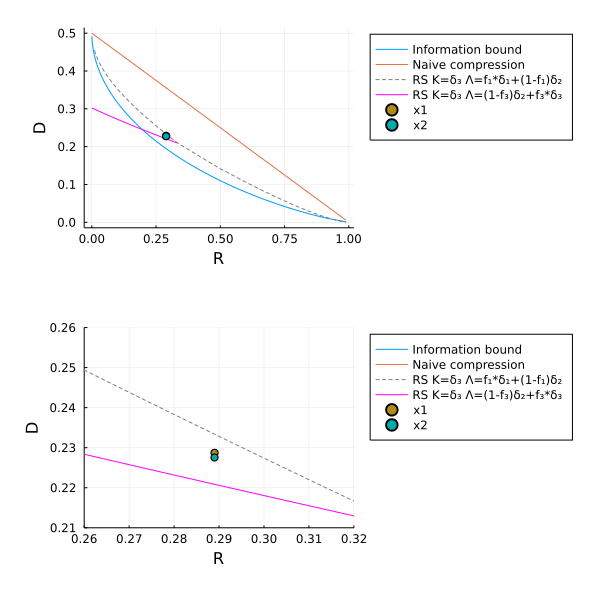

In [670]:
Rtrue = dim1/n
pl = plot_rdb()
scatter!(pl, [Rtrue], [dist1], label="x1")
scatter!(pl, [Rtrue], [dist2], label="x2")
plot(pl, size=(400,300))
pl2 = deepcopy(pl)
xlims!((0.26,0.32)); ylims!((0.21,0.26))
plot(pl2,pl, size=(600,600), margin=5*Plots.mm, layout=(2,1), legend=:outertopright)

## Find paths
We build four kinds of paths

### 1. Path along codewords
- build $x=x_1\oplus x_2$
- find a path $P$ of "small" jumps from $0$ to $x$ by writing $x$ as a combination of basis vectors $x=\alpha^i v_i$: $P=(0,v_1,v_1\oplus v_2,v_1\oplus v_2 \oplus v_3,\dots,x)$
- obtain the corresponding path $P_1=P\oplus x_1$ going from $x_1$ to $x_2$

To find the expansion coefficients $\alpha$ of $x$ on the basis, solve $B\alpha=x$:
- Build $A=[B |x]$
- Reduce it with row operations to 
                                   |   | |
                                   | I |α|
                                   |___|_|
                                   | 0 |0|

In [671]:
B = BB2
A = ([B x])
A,dep = gfrrefGF2!(A)
dropzeros!(A)
alpha = A[dep,end]
@assert B*alpha.%2 == x
sum(alpha)

829

Build path from $0$ to $x$ by accumulating each small jump via a $\oplus$ operation

In [672]:
function build_path(B, alpha, x)
    n = length(x)
    nz_alpha = findall(alpha)
    P = falses(n,length(nz_alpha)+1)
    for (i,a) in enumerate(nz_alpha)
        P[:,i+1] .= xor.(P[:,i], B[:,a])
    end
    @assert P[:,end] == x
    P
end

build_path (generic function with 1 method)

### 2. "Greedy" low-distortion path along codewords
Same as above but each time you add a basis vector, pick the one that gives the smallest distortion w.r.t. the source

In [673]:
# build path picking at each step the basis vector that gives the
#  lowest distortion wrt the source `y`
function build_lowdist_path(B, alpha, x, y)
    n = length(x)
    nz_alpha = findall(alpha)
    P = falses(n,length(nz_alpha)+1)
    for i in 1:length(nz_alpha)
        # pick next 
        j = argmin([sum(B[:,a].!=y) for a in nz_alpha])
        a = nz_alpha[j]
        P[:,i+1] .= xor.(P[:,i], B[:,a])
        deleteat!(nz_alpha, j)
    end
    @assert P[:,end] == x
    P
end

build_lowdist_path (generic function with 1 method)

### 3. "Shortest path" without staying on codewords
Go from $x_1$ to $x_2$ by simply flipping one by one the disagreing spins, in arbitrary order. It won't be a path made of codewords

In [674]:
# build path by simply flipping the disagreing spins in arbitrary order
#  => it won't be a path of codewords
function build_shortest_path(x1, x2)
    disag = findall(x1.!=x2)
    n = length(x1)
    P = falses(n, length(disag)+1)
    P[:,1] .= x1
    for i in eachindex(disag)
        P[:,i+1] .= P[:,i]
        P[disag[i],i+1] = !P[disag[i],i+1]
    end
    P
end

build_shortest_path (generic function with 1 method)

### 4. "Worst shortest path" without staying on codewords
Same as above but flip first the spins in $x_1$ not aligned with the source

In [675]:
# flip the disagreeing spins one by one, but starting with the ones in which x1 agrees with the source y
function build_worst_shortest_path(x1, x2, y)
    disag = findall(x1.!=x2)
    # sort disagreing spins putting first the ones aligned with y
    sort!(disag, by=i->x1[i]==y[i], rev=true)
    n = length(x1)
    P = falses(n, length(disag)+1)
    P[:,1] .= x1
    for i in eachindex(disag)
        P[:,i+1] .= P[:,i]
        P[disag[i],i+1] = !P[disag[i],i+1]
    end
    P
end

build_worst_shortest_path (generic function with 1 method)

In [676]:
Pa = build_path(B, alpha, x)
Pb = build_lowdist_path(B, alpha, x, xor.(s.==-1,x1))
Pc = build_shortest_path(x1,x2)
Pd = build_worst_shortest_path(x1,x2,s.==-1);

### Observe the distortion
<!-- To go from path $P=(0,\dots,x)$ to $P_1=(x_1,\dots,x_2)$, just do $P_1=P\oplus x_1$ -->

In [677]:
P1a = reduce(hcat, [xor.(Pa[:,i],x1) for i in 1:size(Pa,2)])
@assert P1a[:,end]==x2
P1b = reduce(hcat, [xor.(Pb[:,i],x1) for i in 1:size(Pb,2)])
@assert P1b[:,end]==x2

In [678]:
da = [distortion(s, 1 .- 2p) for p in eachcol(P1a)]
dx1a = [sum(x1.!=p) for p in eachcol(P1a)]
db = [distortion(s, 1 .- 2p) for p in eachcol(P1b)]
dx1b = [sum(x1.!=p) for p in eachcol(P1b)]
dc = [distortion(s, 1 .- 2p) for p in eachcol(Pc)]
dx1c = [sum(x1.!=p) for p in eachcol(Pc)]
dd = [distortion(s, 1 .- 2p) for p in eachcol(Pd)]
dx1d = [sum(x1.!=p) for p in eachcol(Pd)];

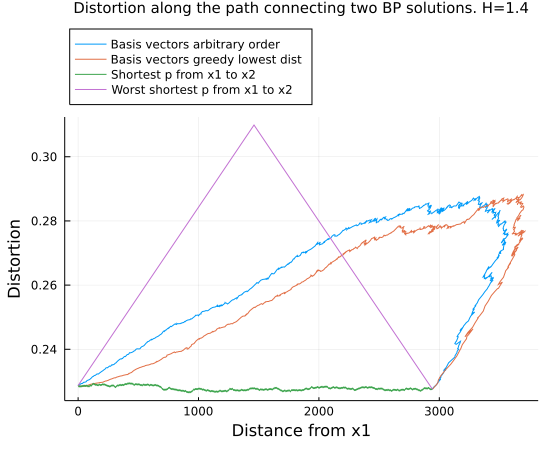

In [679]:
pl = plot()
plot!(pl, dx1a, da, label="Basis vectors arbitrary order")
plot!(pl, dx1b, db, label="Basis vectors greedy lowest dist")
plot!(pl, dx1c, dc, label="Shortest p from x1 to x2")
plot!(pl, dx1d, dd, label="Worst shortest p from x1 to x2")
xlabel!("Distance from x1"); ylabel!("Distortion")
title!("Distortion along the path connecting two BP solutions. H=$(HH)")
plot!(titlefontsize=10, legend=:outertop, size=(550,450))